In [51]:
library('tidyverse')
library('zoo')
library('rjags')
library('forecast')

# P05 - Bayesian Analysis of ARPAV time series on temperatures
#### Guillermo Benito 

#### Sofía Pacheco

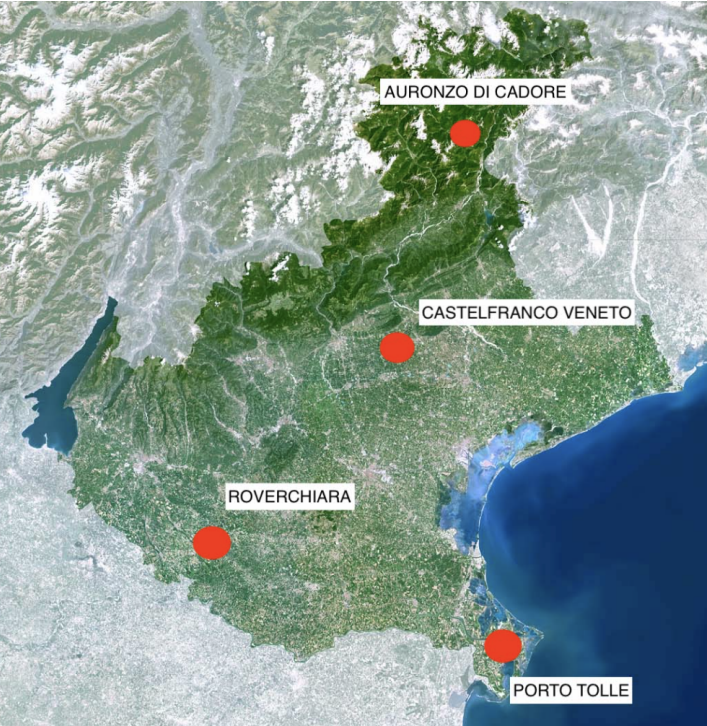

In [2]:
df1 = read.csv("101_Porto Tolle - Pradon_Temperatura aria a 2m.csv")
df2 = read.csv("119_Roverchiara_Temperatura aria a 2m.csv")
df3 = read.csv("34_CASTELFRANCO VENETO_TMINMAX.csv")
df4 = read.csv("53_Auronzo_Temperatura aria a 2m.csv")
df5 = read.csv("8_AURONZO_TMINMAX.csv")

In [3]:
df1 = na.omit(df1)
df2 = na.omit(df2)
df3 = na.omit(df3)
df4 = na.omit(df4)
df5 = na.omit(df5)

In [4]:
add_Year_and_month = function(df){
    df$year=format(as.Date(df$date, "%Y-%m-%d"),'%Y')
    df$month=format(as.Date(df$date, "%Y-%m-%d"),'%m')
    return(df)
}

In [5]:
df1 = add_Year_and_month(df1)
df2 = add_Year_and_month(df2)
df3 = add_Year_and_month(df3)
df4 = add_Year_and_month(df4)
df5 = add_Year_and_month(df5)

In [6]:
head(df1)

date       TMIN TMED    TMAX year month
475 1989-04-19  4.6 11.8135 16.6 1989 04   
476 1989-04-20  5.9 12.9240 18.0 1989 04   
477 1989-04-21 11.8 12.9281 14.5 1989 04   
478 1989-04-22  4.9 11.3365 17.1 1989 04   
479 1989-04-23  3.8 10.1469 16.7 1989 04   
480 1989-04-24  4.5 11.6469 16.5 1989 04

## Part 0

### Study the evolution over time of the min, max and average temperatures computed over one month.

In [7]:
group_Year_month = function(df){
    df |> group_by(year,month) |> summarise(Tmin_avg = mean(TMIN), Tmed_avg = mean(TMED), Tmax_avg = mean(TMAX),date=min(date))
}

In [8]:
df1_0=group_Year_month(df1)
df2_0=group_Year_month(df2)
df3_0=group_Year_month(df3)
df4_0=group_Year_month(df4)
df5_0=group_Year_month(df5)

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.


In [9]:
plot_0=function(df_0,main){
    df_0$date = as.Date(df_0$date, "%Y-%m-%d")
    plot(df_0$date,df_0$Tmed_avg,xaxt = "n", type = "l",ylab='T',main=main,col='green',xlab='Month',ylim=c(min(df_0$Tmin_avg)*0.8,max(df_0$Tmax_avg)*1.2),lwd=1.5)
    axis(1, df_0$date, format(df_0$date, "%m -%y"), cex.axis = 1)
    lines(df_0$date,df_0$Tmin_avg,col='blue',lwd=1)
    lines(df_0$date,df_0$Tmax_avg,col='red',lwd=1)
    legend(x='topleft',legend=c('mean T','min T','max T'),col=c('green','blue','red'),lwd=c(1.5,1,1))
    }

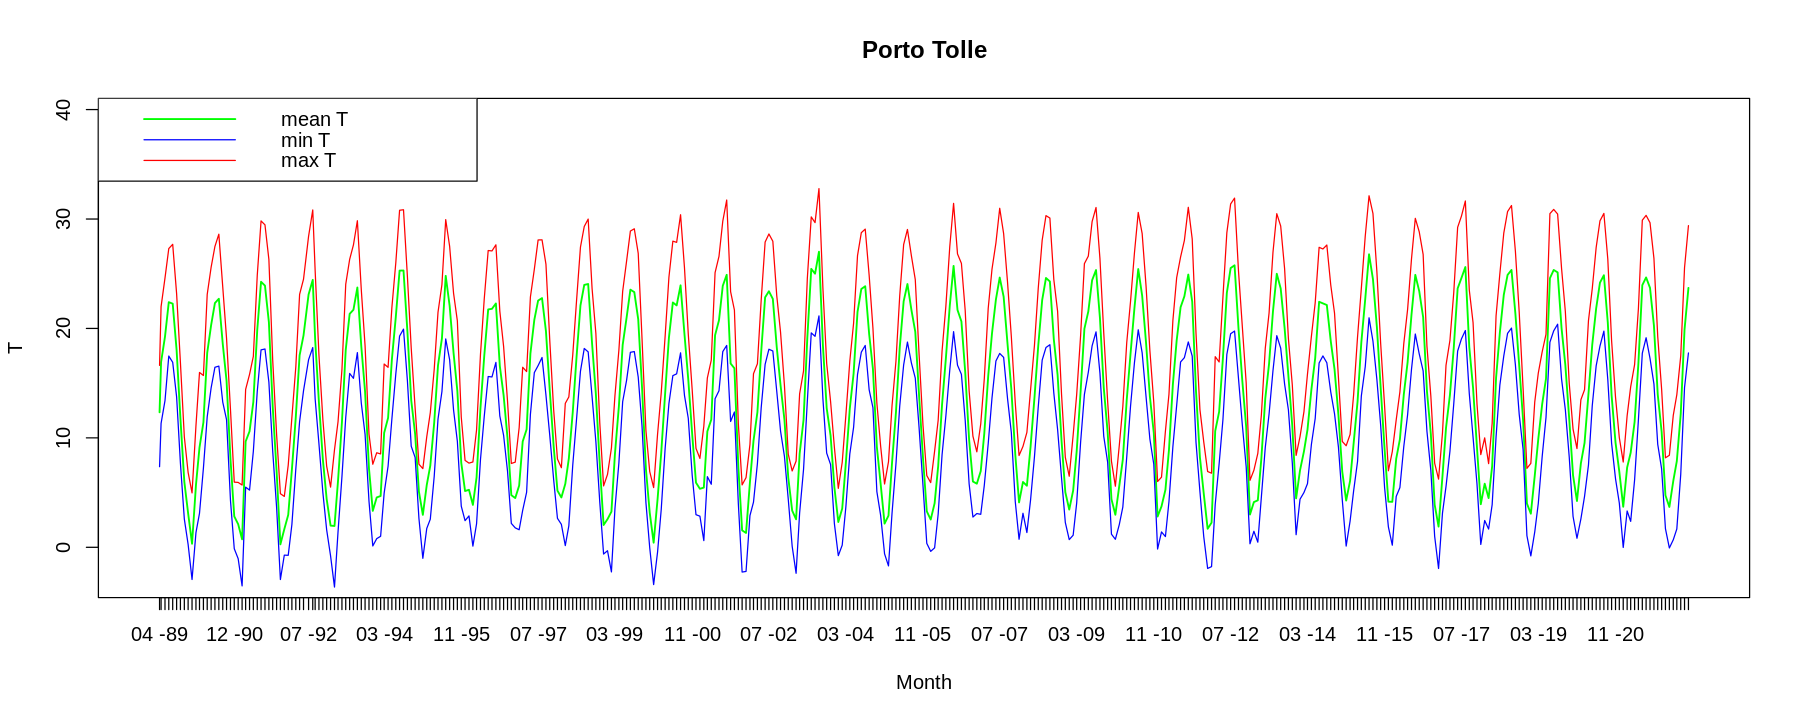

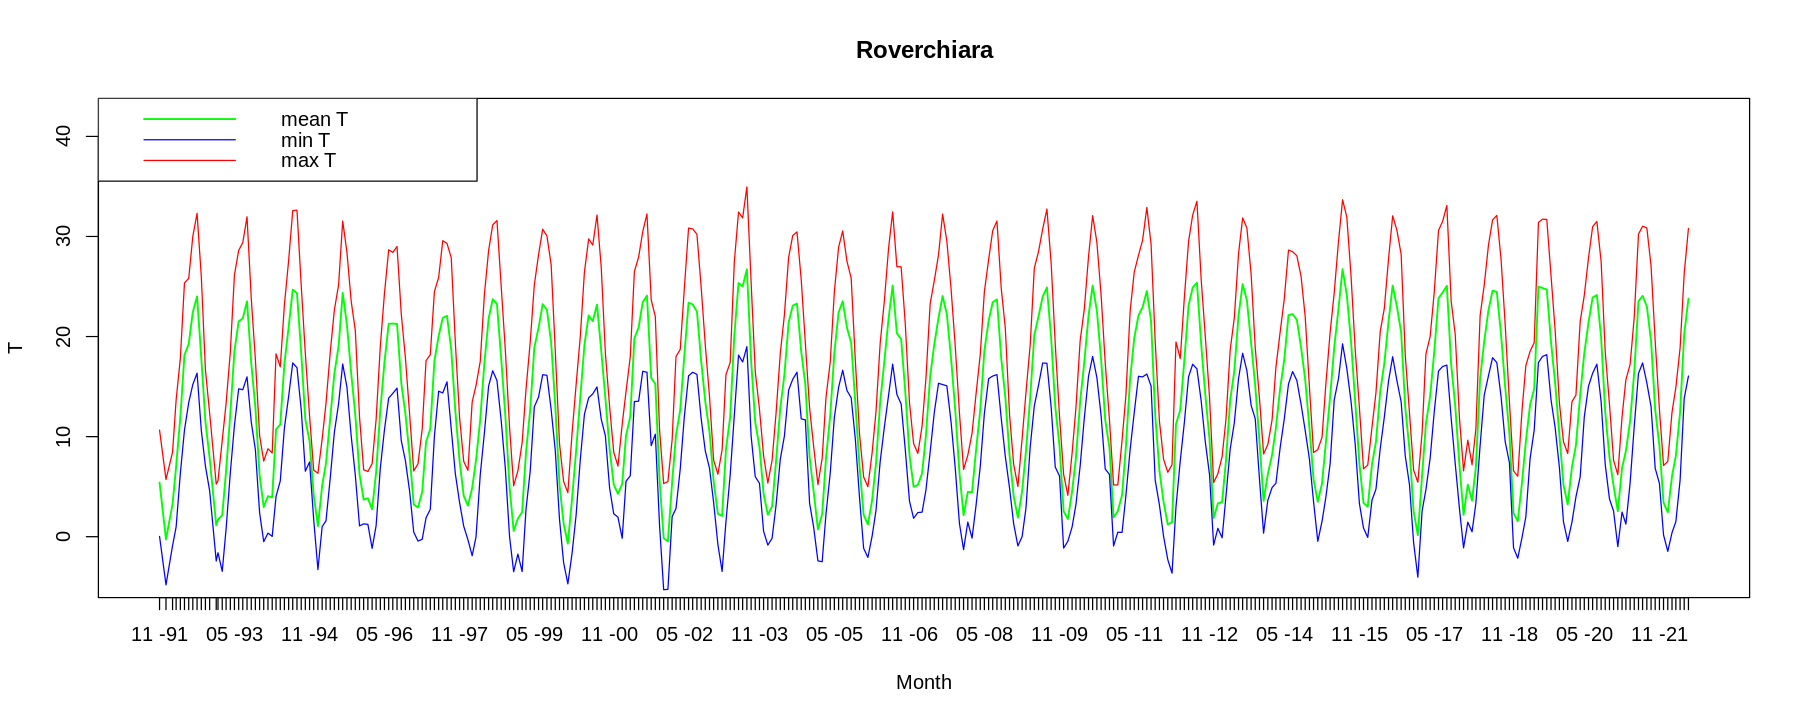

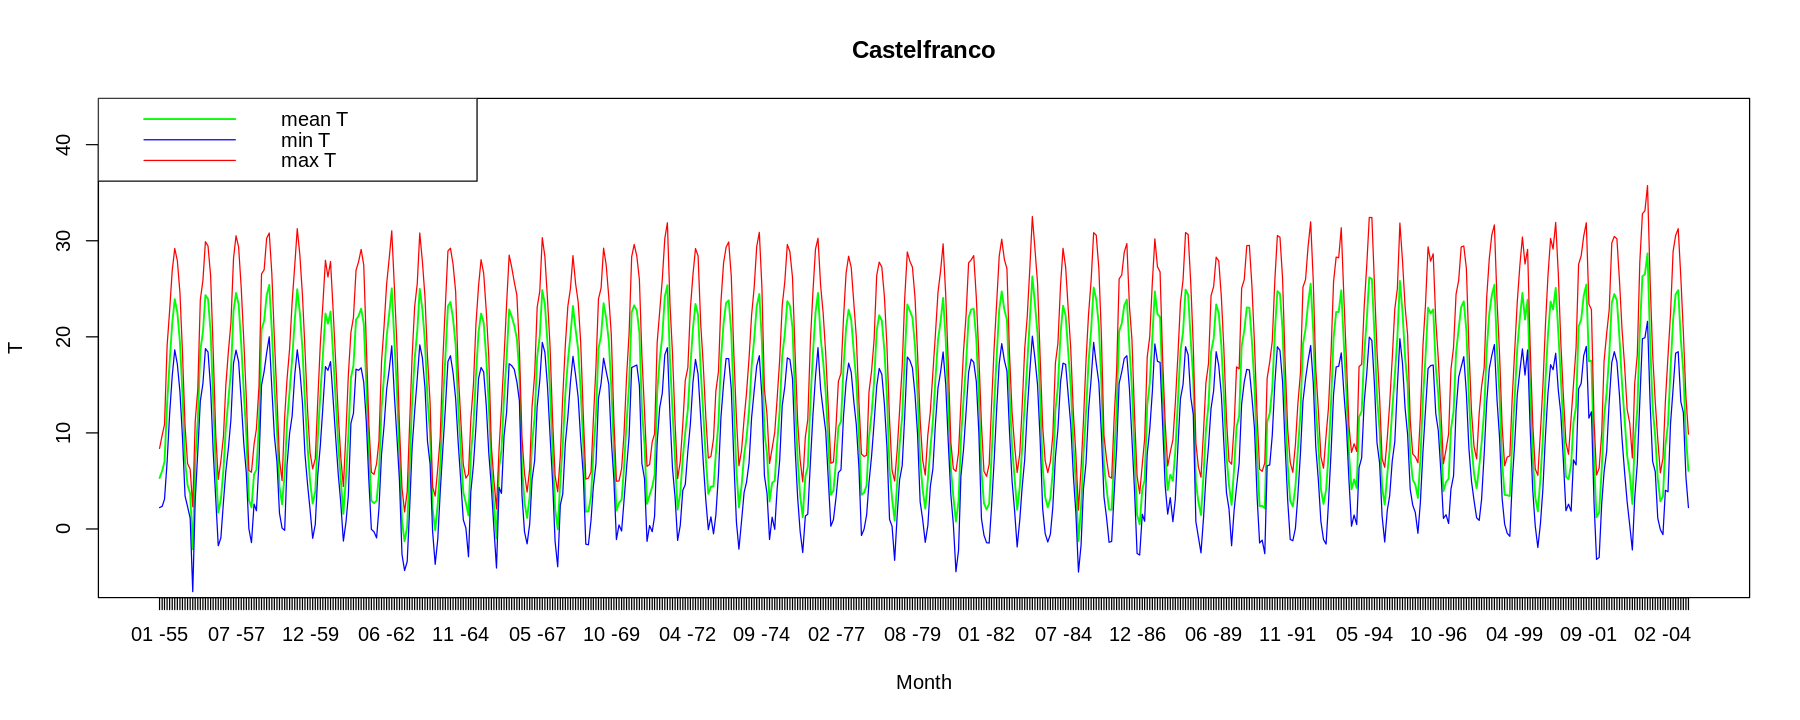

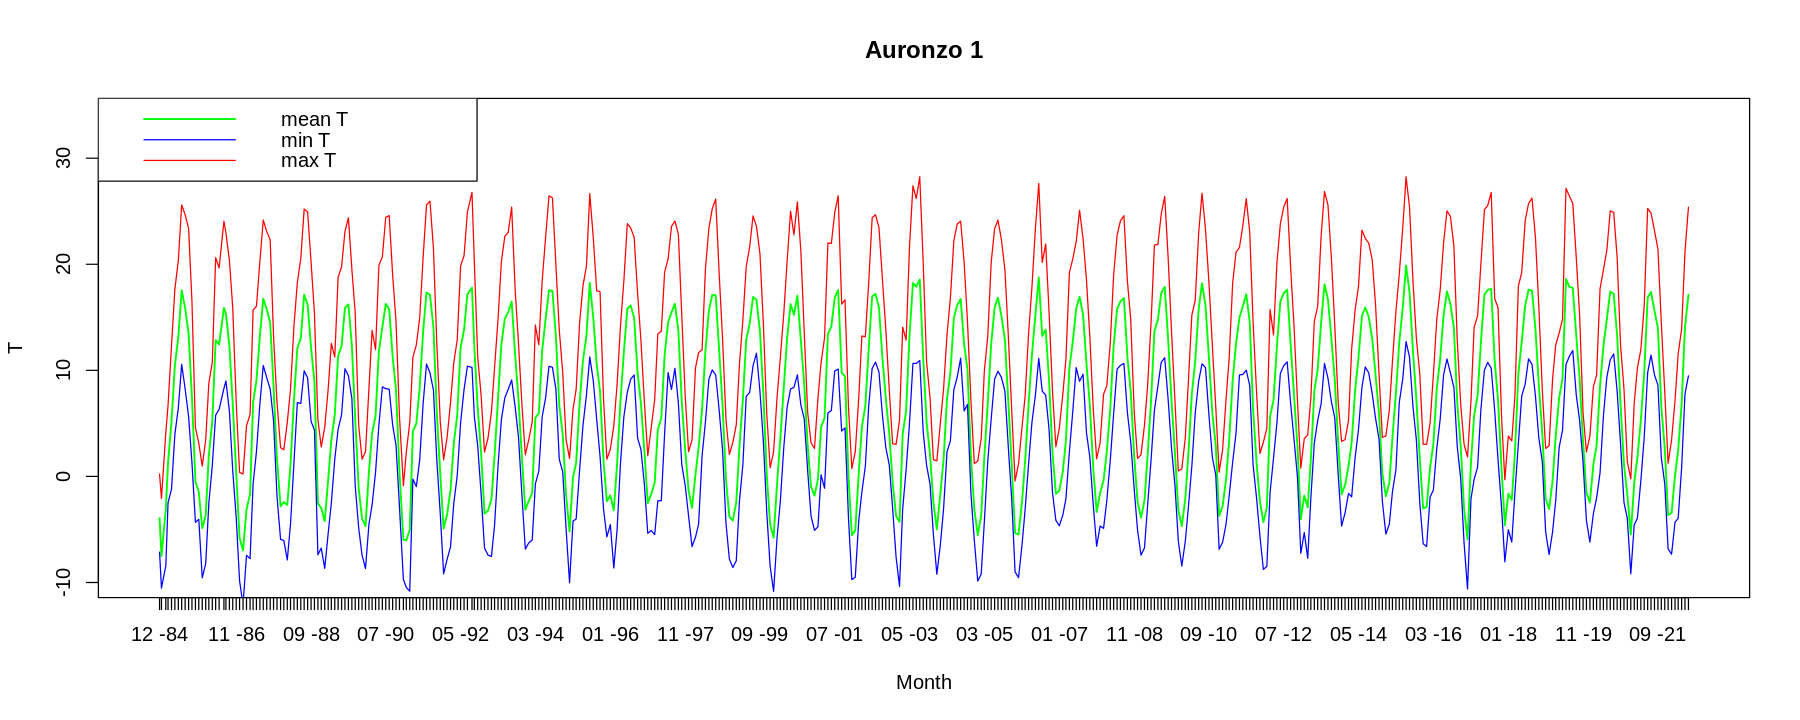

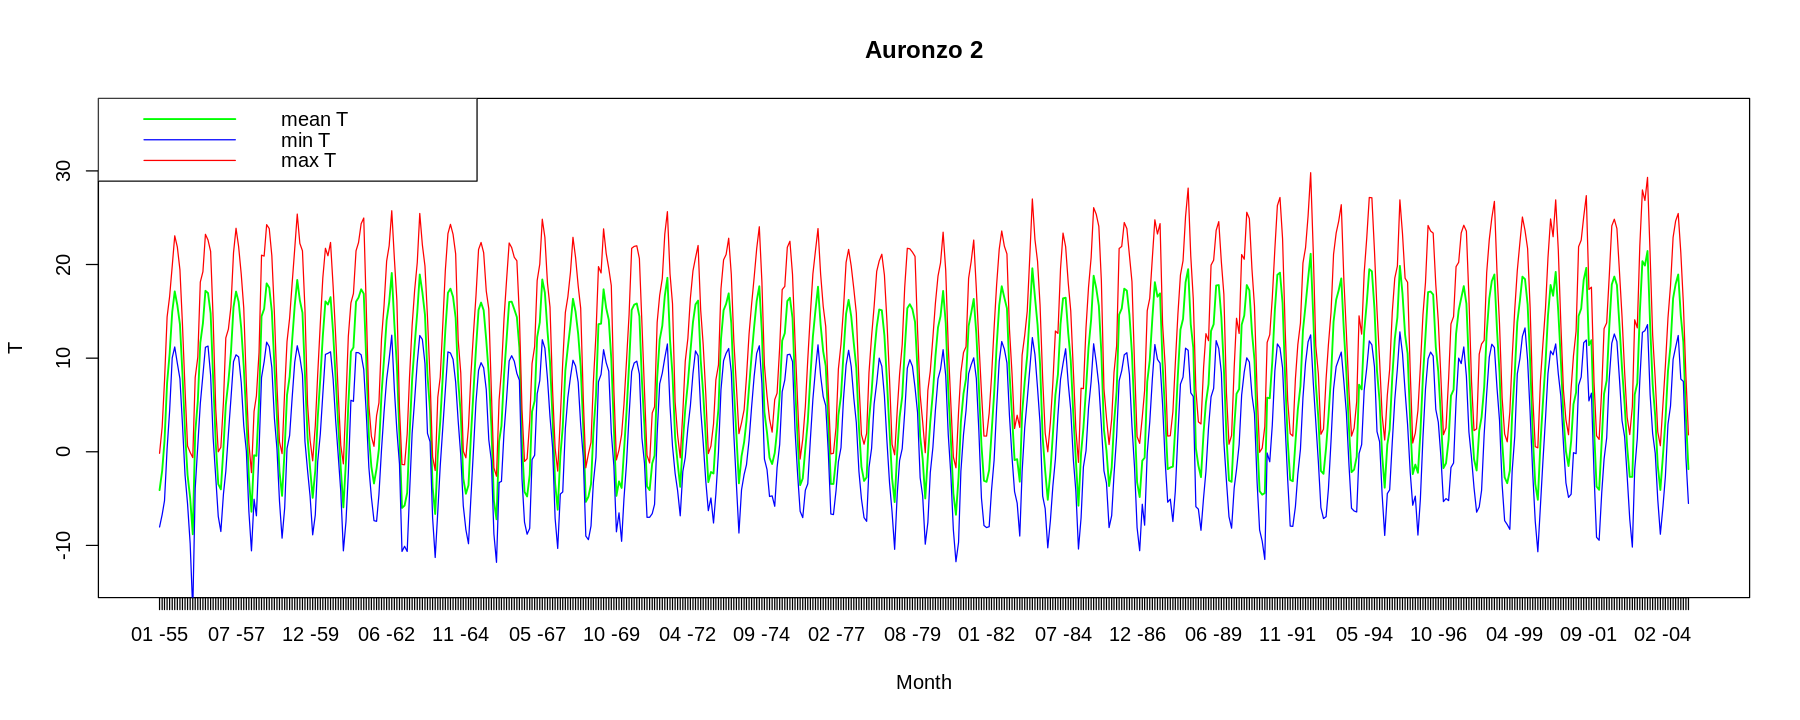

In [10]:
mains=c('Porto Tolle','Roverchiara','Castelfranco','Auronzo 1','Auronzo 2')

options(repr.plot.width = 15, repr.plot.height = 6)

plot_0(df1_0,mains[1])
plot_0(df2_0,mains[2])
plot_0(df3_0,mains[3])
plot_0(df4_0,mains[4])
plot_0(df5_0,mains[5])

## Part 1

### Analysis of the evolution of the annual average of the min, max and daily average temperature over time (1993 - 2021)


#### 1. study the trend of the annual averages and compare them with a constant value or a rising trend (for instance linear or quadratic)

In [11]:
group_Year = function(df){
    df |> group_by(year) |> summarise(Tmin_avg = mean(TMIN), Tmed_avg = mean(TMED), Tmax_avg = mean(TMAX))
}

In [12]:
df1_1 = group_Year(df1)
df2_1 = group_Year(df2)
df3_1 = group_Year(df3)
df4_1 = group_Year(df4)
df5_1 = group_Year(df5)

In [13]:
select_Years = function(df){
    
    if (2021 %in% df$year){
        df_=df[which(df$year==1993):which(df$year==2021),]
    }else{
        max_year = max(df$year)
        df_=df[which(df$year==1993):which(df$year==max_year),]
    }
    df_$year=as.numeric(df_$year)
    return(df_)
}

In [14]:
df1_1 = select_Years(df1_1)
df2_1 = select_Years(df2_1)
df3_1 = select_Years(df3_1)
df4_1 = select_Years(df4_1)
df5_1 = select_Years(df5_1)

In [15]:
plot_1 = function(df_1, main){
    plot(df_1$year, df_1$Tmin_avg, type='l', ylab='Temperature', col='blue', xlab='Year', ylim = c(min(df_1$Tmin_avg)*0.8, max(df_1$Tmax_avg)*1.2), lwd=2, main=main)
    lines(df_1$year, df_1$Tmed_avg, type='l', col='green', lwd=2)
    lines(df_1$year, df_1$Tmax_avg, type='l', col='red', lwd=2)
    legend(x='topright', legend=c('max T','mean T','min T'), col=c('red','green', 'blue'), lwd=2, cex=1.1)
}

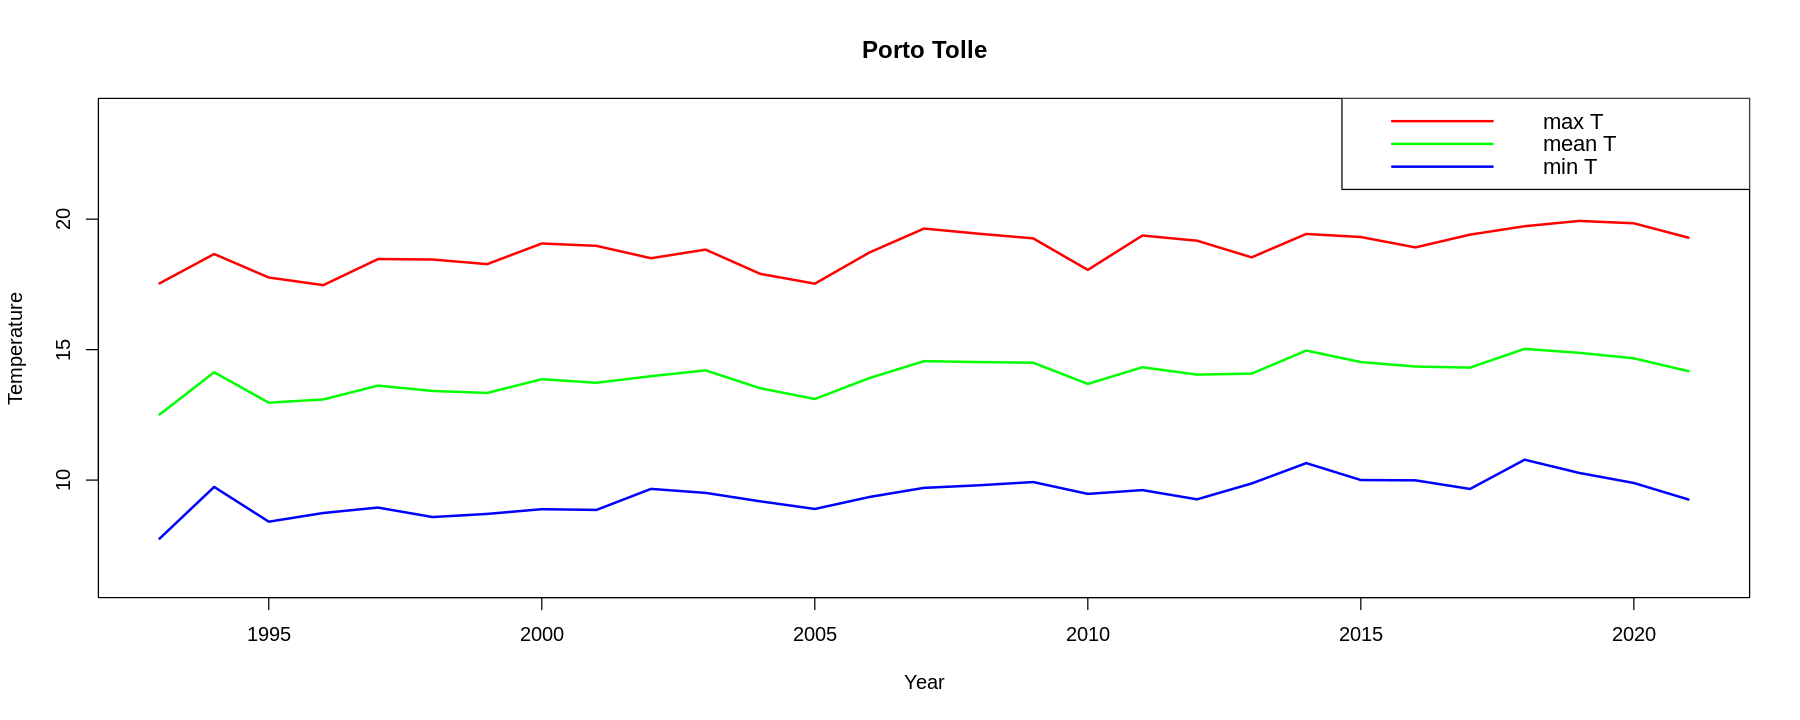

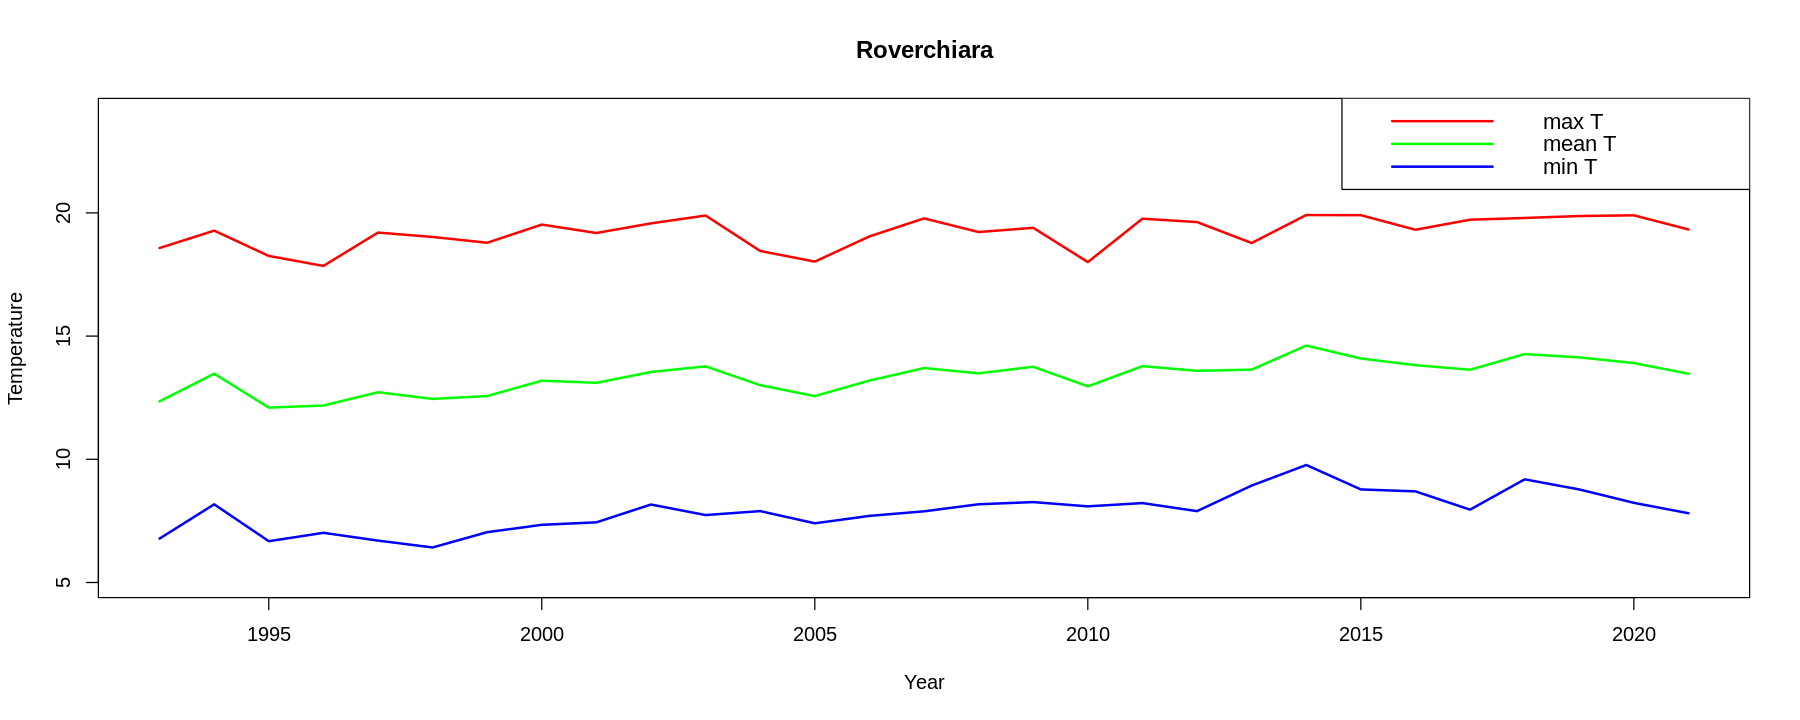

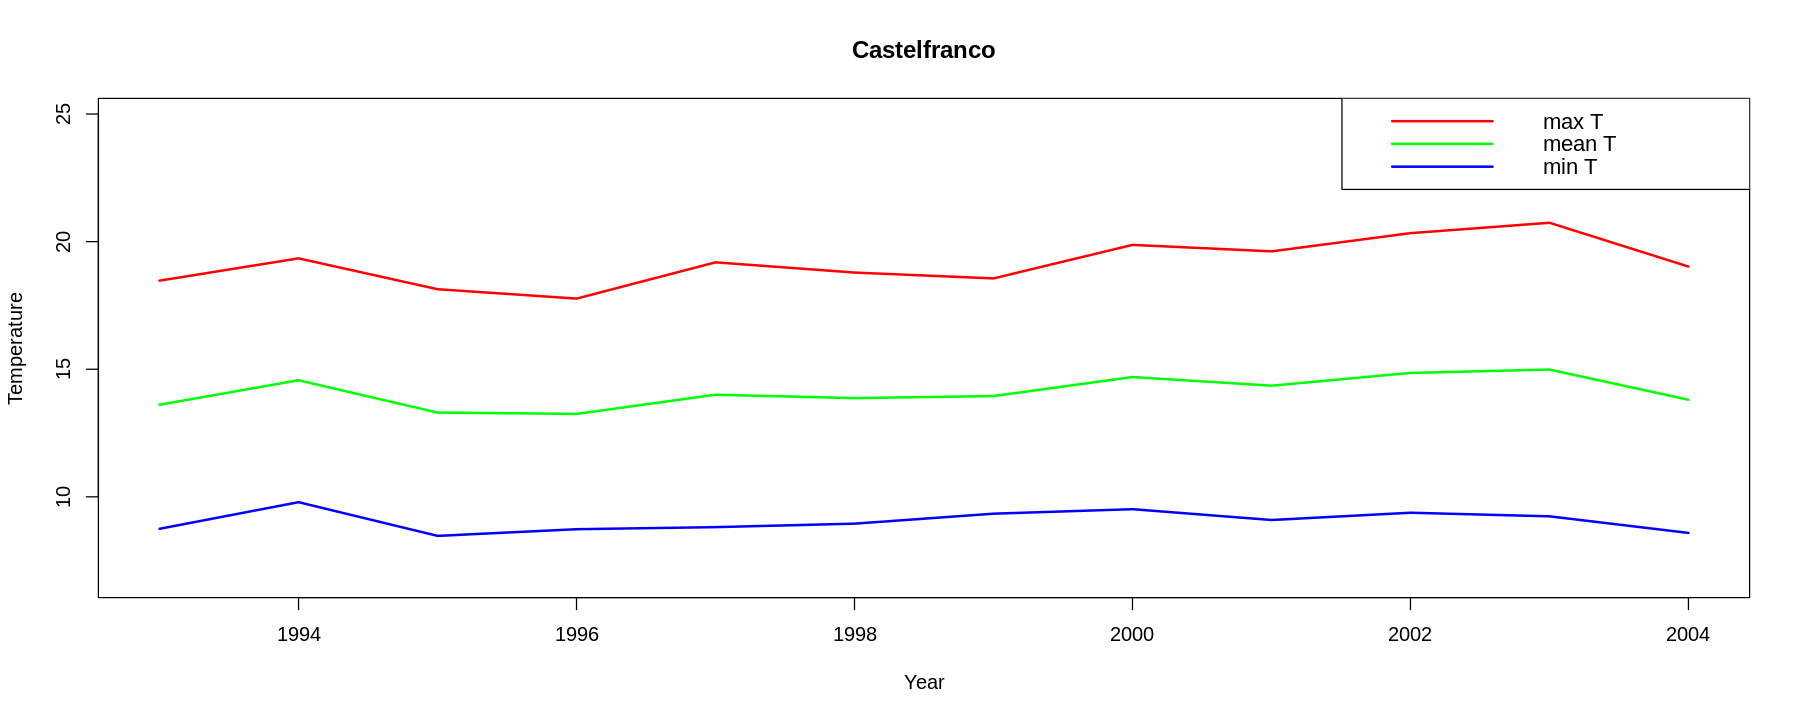

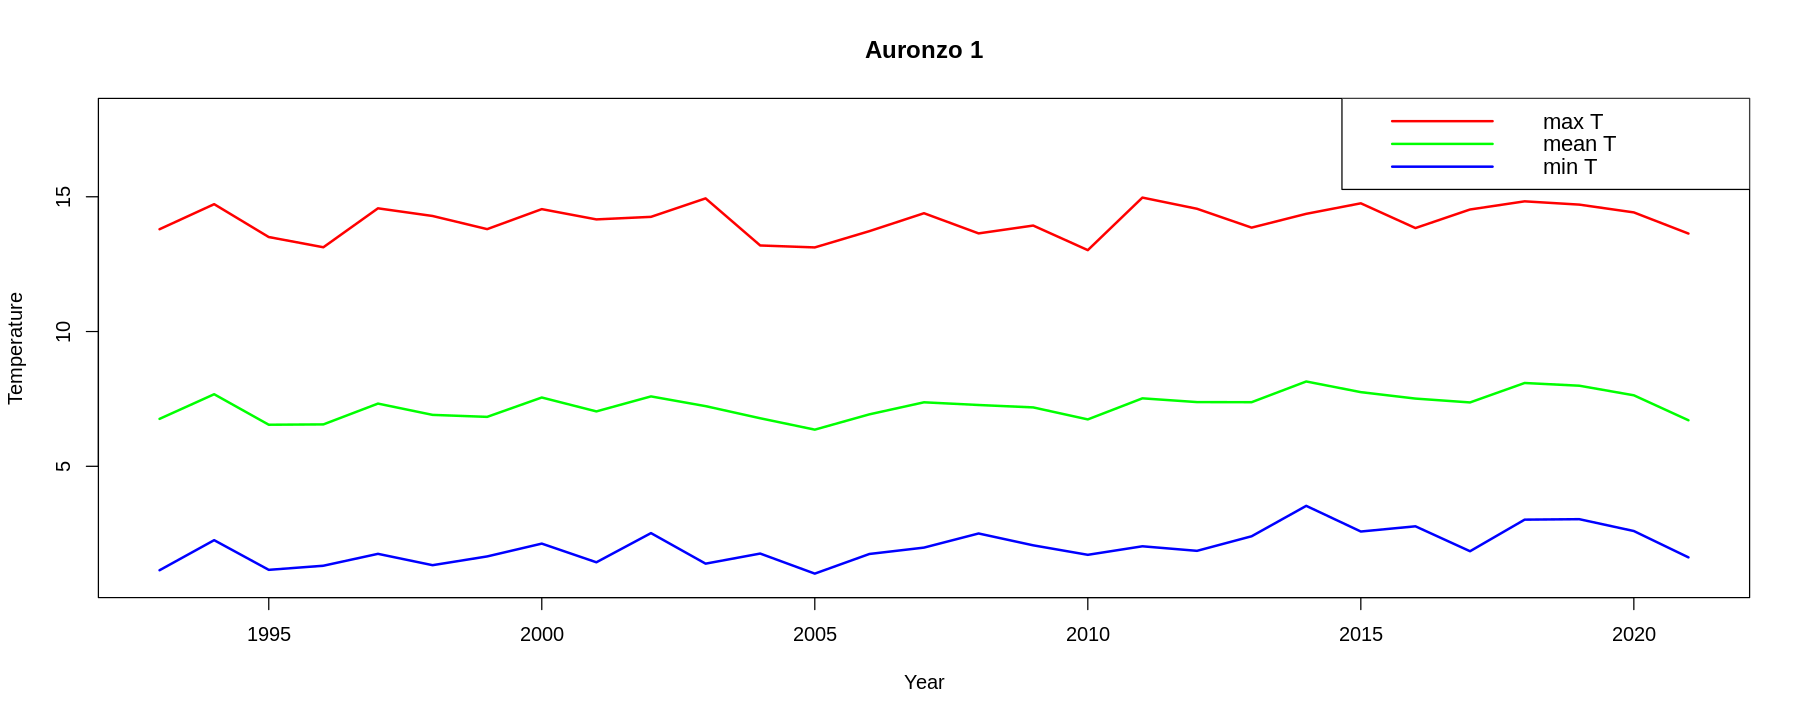

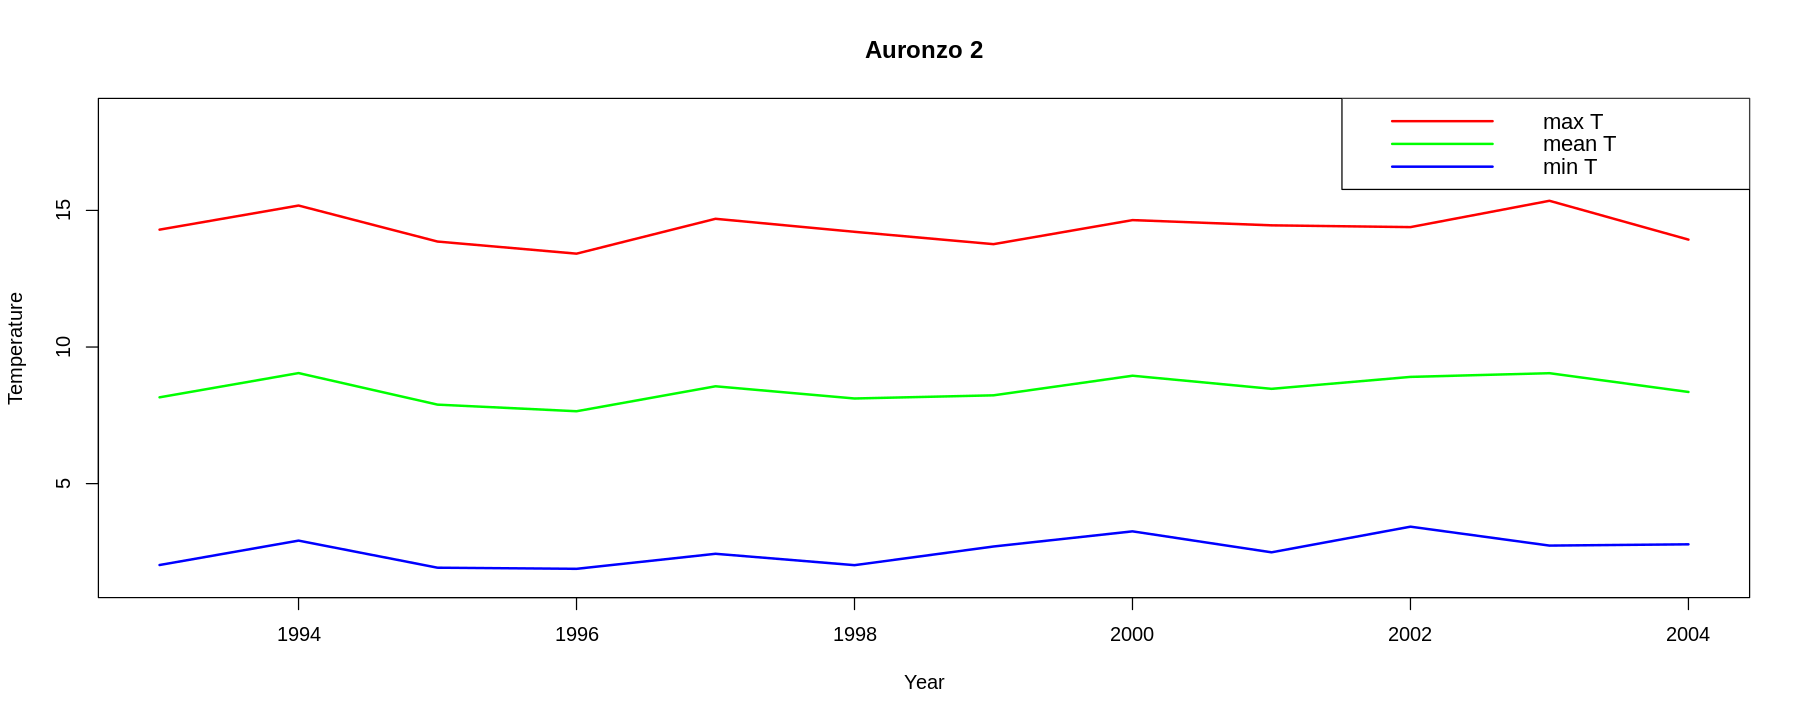

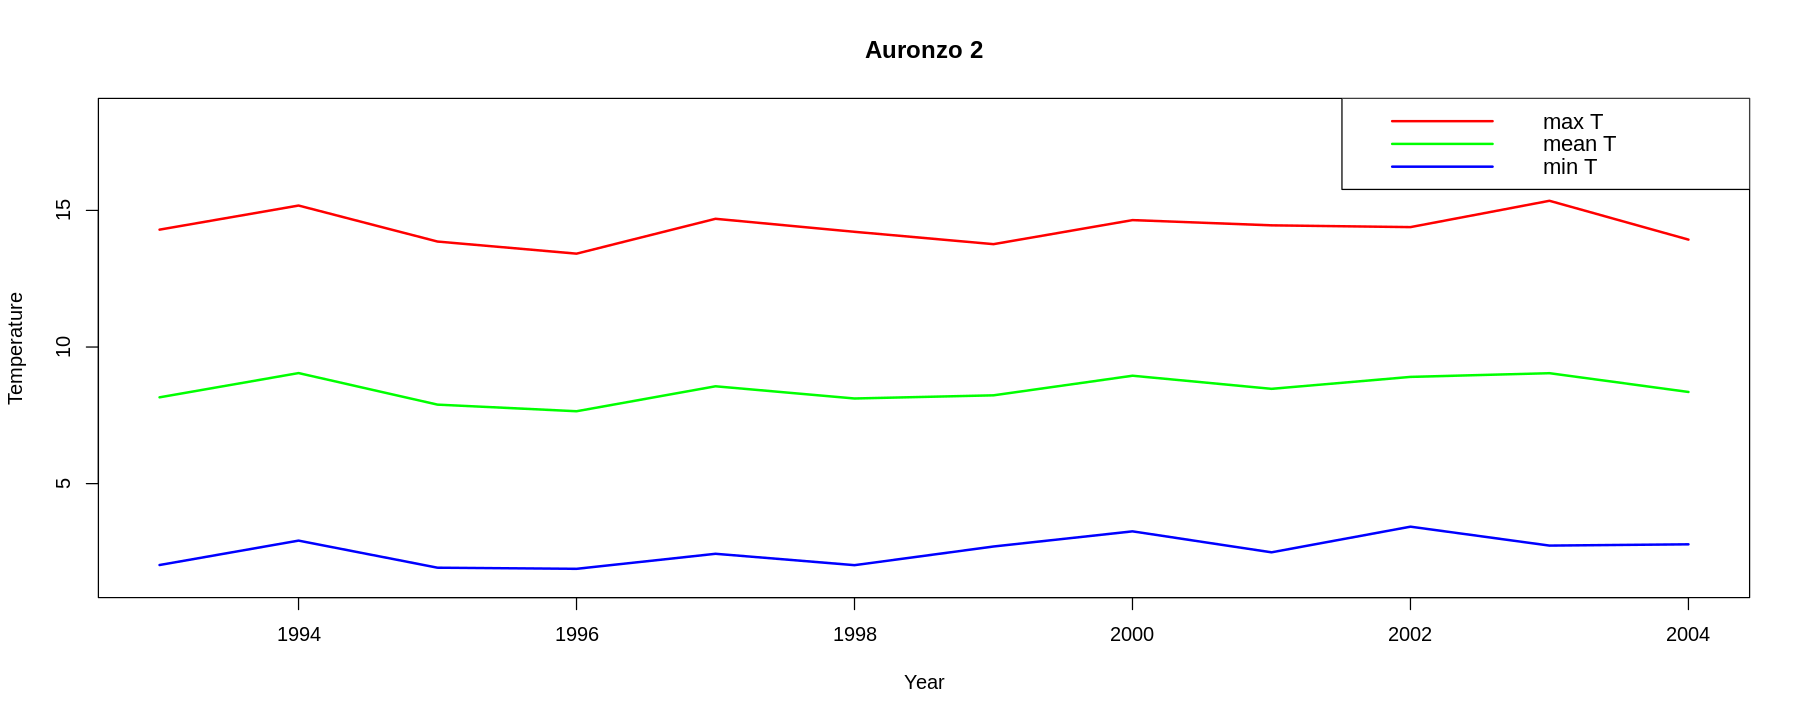

In [16]:
options(repr.plot.width = 15, repr.plot.height = 6)

mains=c('Porto Tolle','Roverchiara','Castelfranco','Auronzo 1','Auronzo 2')

plot_1(df1_1, mains[1])
plot_1(df2_1, mains[2])
plot_1(df3_1, mains[3])
plot_1(df4_1, mains[4])
plot_1(df5_1, mains[5])

It looks like there lines in each plot follow either a constant trend or a linear trend with very low possitive slope.

#### 2. perform an analysis using a Bayesian linear regression with JAGS or STAN and perform the same analysis using a constant regression


_Model_

- The first part specifies the **likelihood** of the data given the linear regression model. Each value of temperature is a random draw from a normal distribution whose mean linearly depends time (year). The parameters whose values are to be estimated are the intercept and slope of the linear relationship.

- The second part of the function specifies the **prior** distribution for each parameter. We choose uninformative priors for all parameters, using flat distributions. The prior distribution for alpha and beta is a normal distribution with mean zero and low precision, that is, large standard deviation. Since the standard deviation of a normal distribution can only be positive, we use a uniform distribution with a minimum of zero and a large maximum as prior for sigma.

In [17]:
cat('model {
    # data likelihood
    for(i in 1:N){
        T[i] ~ dnorm(mu[i],tau) # tau = 1/sigma^2 precission
        mu[i]=intercept+slope*year[i] # equation of linear regression
    }
    # prior for intercept and slope
    slope ~ dnorm(0,0.01)
    intercept ~ dnorm(0,0.01)
    sigma ~ dunif(0,100)
    tau=1/(sigma*sigma)
;
    }',file='linear.txt')

In [ ]:
cat('model {
    # data likelihood
    for(i in 1:N){
        T[i] ~ dnorm(mu[i],tau)
        mu[i]=intercept #equation for constant regression
    }
    # prior for intercept and slope
    intercept ~ dnorm(0,0.01)
    sigma ~ dunif(0,100)
    tau=1/(sigma*sigma)
;
    }',file='constant.txt')

We scale and center the x values before the analysis subtracting the mean and dividing by the standard deviation. This transformation results in values with a mean of 0 and standard deviation of 1 and is performed to avoid running into problems with model fitting. 

In [19]:
MCMC=function(df,iter=10000,thin=20,burn=1000,plot=FALSE,temperature){ ## plot=BOOLEAN --> want the plot?
    ##assign the data
    
    #linear
    data_lin= NULL
    data_lin$T=temperature
    data_lin$year=(df$year-mean(df$year))/sd(df$year) ## "normalized" data
    data_lin$N=length(df$year)

    #constant
    data_const= NULL
    data_const$T=temperature
    data_const$N=length(df$year)

    ##MCMC
    #linear
    model = 'linear.txt'
    jm =jags.model(model , data_lin)
    update(jm , burn) # burnin
    chain = coda.samples(jm , c("slope","intercept","sigma"), n.iter=iter,n.thin=thin)
    #print(summary(chain))
    slope_lin=mean(chain[[1]][,'slope'])
    intercept_lin=mean(chain[[1]][,'intercept'])
    sigma_lin=mean(chain[[1]][,'sigma'])
    quantiles_lin=summary(chain,quantiles=c(0.025,0.0975))$quantiles  ## quantiles for the hypothesis test
    means_lin=c(intercept_lin,sigma_lin,slope_lin)
    if (plot==TRUE){
        plot(chain)
    }

    #constant
    model = 'constant.txt'
    jm =jags.model(model , data_const)
    update(jm , burn) # burnin
    chain = coda.samples(jm , c("intercept","sigma"), n.iter=iter,n.thin=thin)
    #print(summary(chain))
    slope=0 ## 0 since is a constant regression
    intercept_const=mean(chain[[1]][,'intercept'])
    sigma_const=mean(chain[[1]][,'sigma'])
    quantiles_const=summary(chain,quantiles=c(0.025,0.0975))$quantiles  
    means_const=c(intercept_const,sigma_const,0) ## means for the hypothesis test
    if (plot==TRUE){
        plot(chain)
    }
    
    return(list(means_lin,quantiles_lin,means_const,quantiles_const))
    }

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 29
   Unobserved stochastic nodes: 3
   Total graph size: 126

Initializing model

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 29
   Unobserved stochastic nodes: 2
   Total graph size: 38

Initializing model



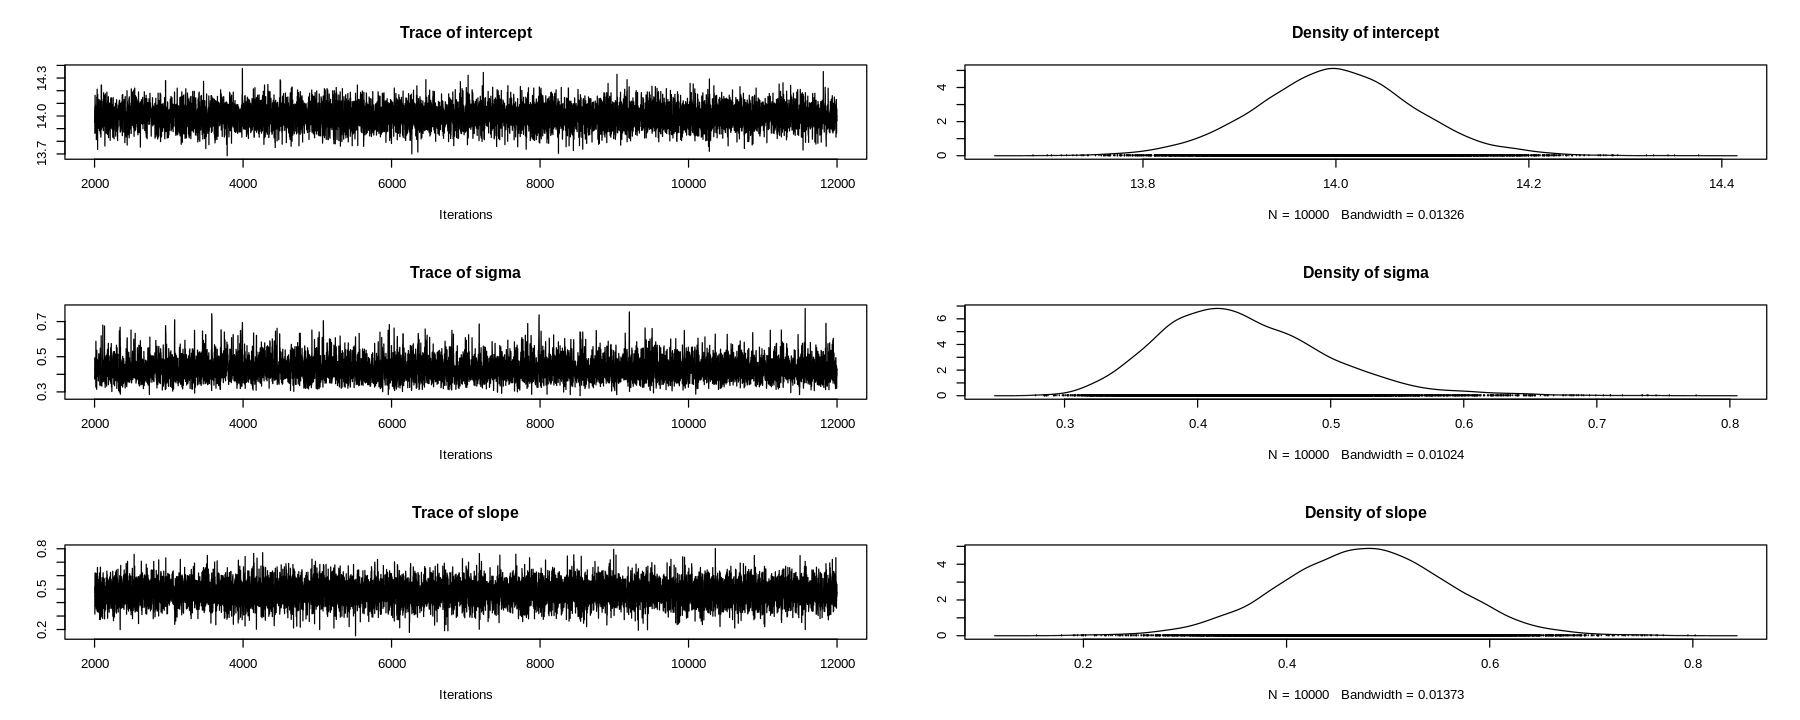

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 29
   Unobserved stochastic nodes: 3
   Total graph size: 126

Initializing model

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 29
   Unobserved stochastic nodes: 2
   Total graph size: 38

Initializing model

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 12
   Unobserved stochastic nodes: 3
   Total graph size: 58

Initializing model

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 12
   Unobserved stochastic nodes: 2
   Total graph size: 21

Initializing model

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 29
   Unobserved stochastic nodes: 3
   Total 

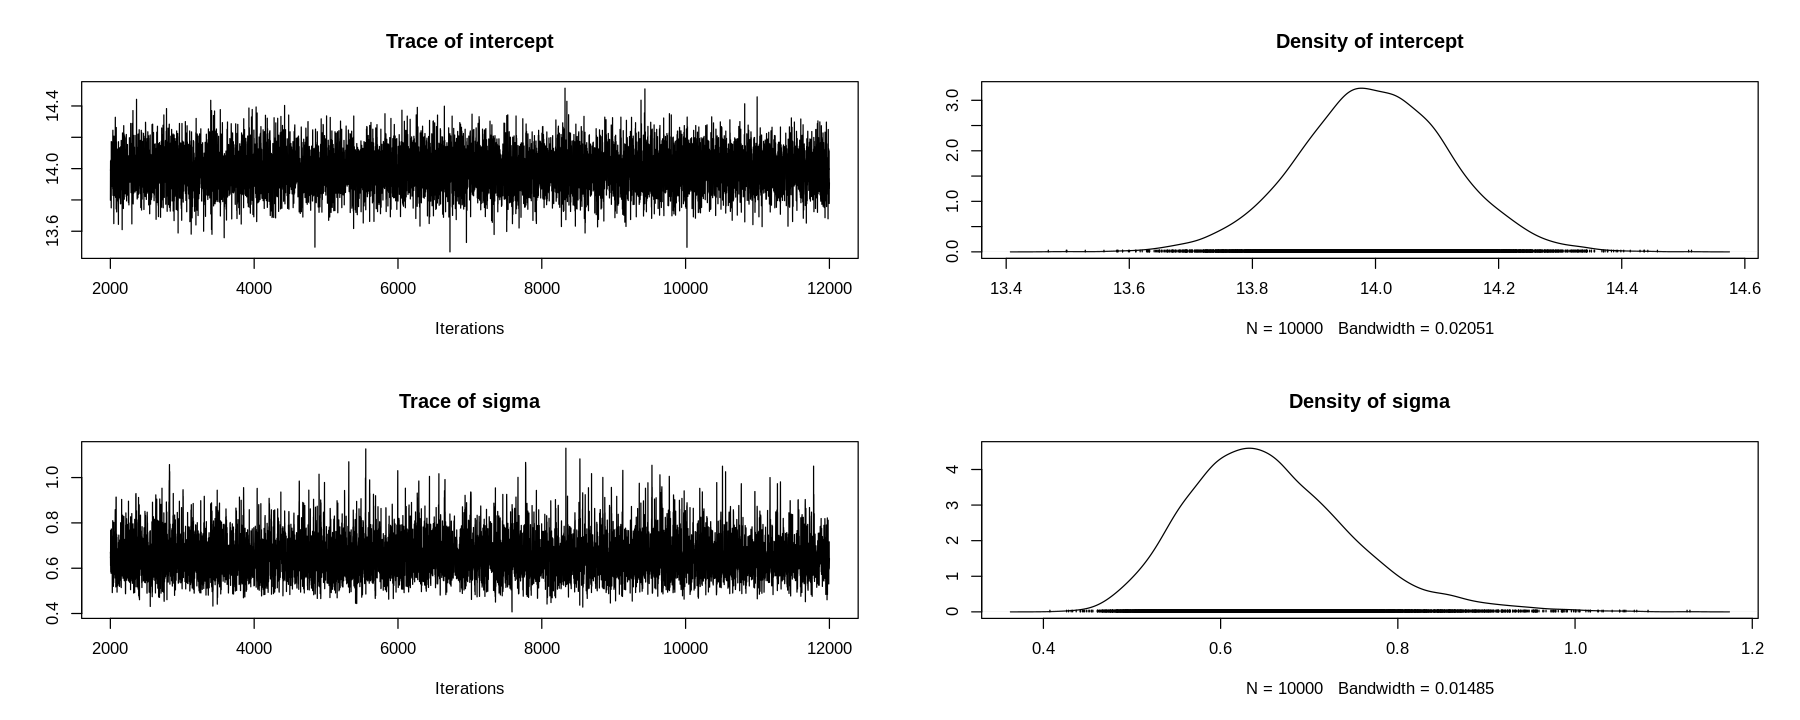

In [20]:
## results for mean T
results_1_med=MCMC(df1_1,plot=TRUE,temperature=df1_1$Tmed_avg)
results_2_med=MCMC(df2_1,plot=FALSE,temperature=df2_1$Tmed_avg)
results_3_med=MCMC(df3_1,plot=FALSE,temperature=df3_1$Tmed_avg)
results_4_med=MCMC(df4_1,plot=FALSE,temperature=df4_1$Tmed_avg)
results_5_med=MCMC(df5_1,plot=FALSE,temperature=df5_1$Tmed_avg)

##results for min T
results_1_min=MCMC(df1_1,plot=FALSE,temperature=df1_1$Tmin_avg)
results_2_min=MCMC(df2_1,plot=FALSE,temperature=df2_1$Tmin_avg)
results_3_min=MCMC(df3_1,plot=FALSE,temperature=df3_1$Tmin_avg)
results_4_min=MCMC(df4_1,plot=FALSE,temperature=df4_1$Tmin_avg)
results_5_min=MCMC(df5_1,plot=FALSE,temperature=df5_1$Tmin_avg)

##results for max T
results_1_max=MCMC(df1_1,plot=FALSE,temperature=df1_1$Tmax_avg)
results_2_max=MCMC(df2_1,plot=FALSE,temperature=df2_1$Tmax_avg)
results_3_max=MCMC(df3_1,plot=FALSE,temperature=df3_1$Tmax_avg)
results_4_max=MCMC(df4_1,plot=FALSE,temperature=df4_1$Tmax_avg)
results_5_max=MCMC(df5_1,plot=FALSE,temperature=df5_1$Tmax_avg)

In [21]:
plot_regresions=function(df_1,results_med,results_min,results_max,main){
    years=(df_1$year-mean(df_1$year))/sd(df_1$year)
    
    #med
    intercept_med = unlist(results_med[1])[1]
    sigma_med = unlist(results_med[1])[2]
    slope_med= unlist(results_med[1])[3]
    mu_med=intercept_med+slope_med*years
    
    uncertainty_pos_med=qnorm((1-0.954)/2,mu_med,sigma_med) ### 2 sigma of uncertainty = 95.4%
    uncertainty_neg_med=qnorm((1+0.954)/2,mu_med,sigma_med)       
    
    #min
    intercept_min = unlist(results_min[1])[1]
    sigma_min = unlist(results_min[1])[2]
    slope_min= unlist(results_min[1])[3]
    mu_min=intercept_min+slope_min*years
    
    uncertainty_pos_min=qnorm((1-0.954)/2,mu_min,sigma_min) ### 2 sigma of uncertainty = 95.4%
    uncertainty_neg_min=qnorm((1+0.954)/2,mu_min,sigma_min)       
        
    #max
    intercept_max = unlist(results_max[1])[1]
    sigma_max = unlist(results_max[1])[2]
    slope_max= unlist(results_max[1])[3]
    mu_max=intercept_max+slope_max*years
    
    uncertainty_pos_max=qnorm((1-0.954)/2,mu_max,sigma_max) ### 2 sigma of uncertainty = 95.4%
    uncertainty_neg_max=qnorm((1+0.954)/2,mu_max,sigma_max) 
    
    
    #plot points
    plot(df_1$year, df_1$Tmin_avg, type='p', ylab='Temperature', col='blue', xlab='Year', ylim = c(min(df_1$Tmin_avg)*0.8, max(df_1$Tmax_avg)*1.5), lwd=2, main=main)
    points(df_1$year, df_1$Tmed_avg, type='p', col='green', lwd=2)
    points(df_1$year, df_1$Tmax_avg, type='p', col='red', lwd=2)
    
    #plot regression for med
    lines(df_1$year,uncertainty_pos_med,lty=3,lwd=2,col='green')
    lines(df_1$year,uncertainty_neg_med,lty=3,lwd=2,col='green')
    lines(df_1$year,mu_med,lwd=2,col='green')
    
    
    #plot regression for min
    lines(df_1$year,uncertainty_pos_min,lty=3,lwd=2,col='blue')
    lines(df_1$year,uncertainty_neg_min,lty=3,lwd=2,col='blue')
    lines(df_1$year,mu_min,lwd=2,col='blue')
    
    
    #plot regression for max
    lines(df_1$year,uncertainty_pos_max,lty=3,lwd=2,col='red')
    lines(df_1$year,uncertainty_neg_max,lty=3,lwd=2,col='red')
    lines(df_1$year,mu_max,lwd=2,col='red')
    
    legend(x='topleft', legend=c(paste('max T','(slope',round(slope_max,2),')'),paste('mean T','(slope',round(slope_med,2),')'),paste('min T','(slope',round(slope_min,2),')'),'2 sigma uncertainty'), col=c('red','green', 'blue','black'), lwd=2, lty=c(1,1,1,3), cex=1.1)
    
    }

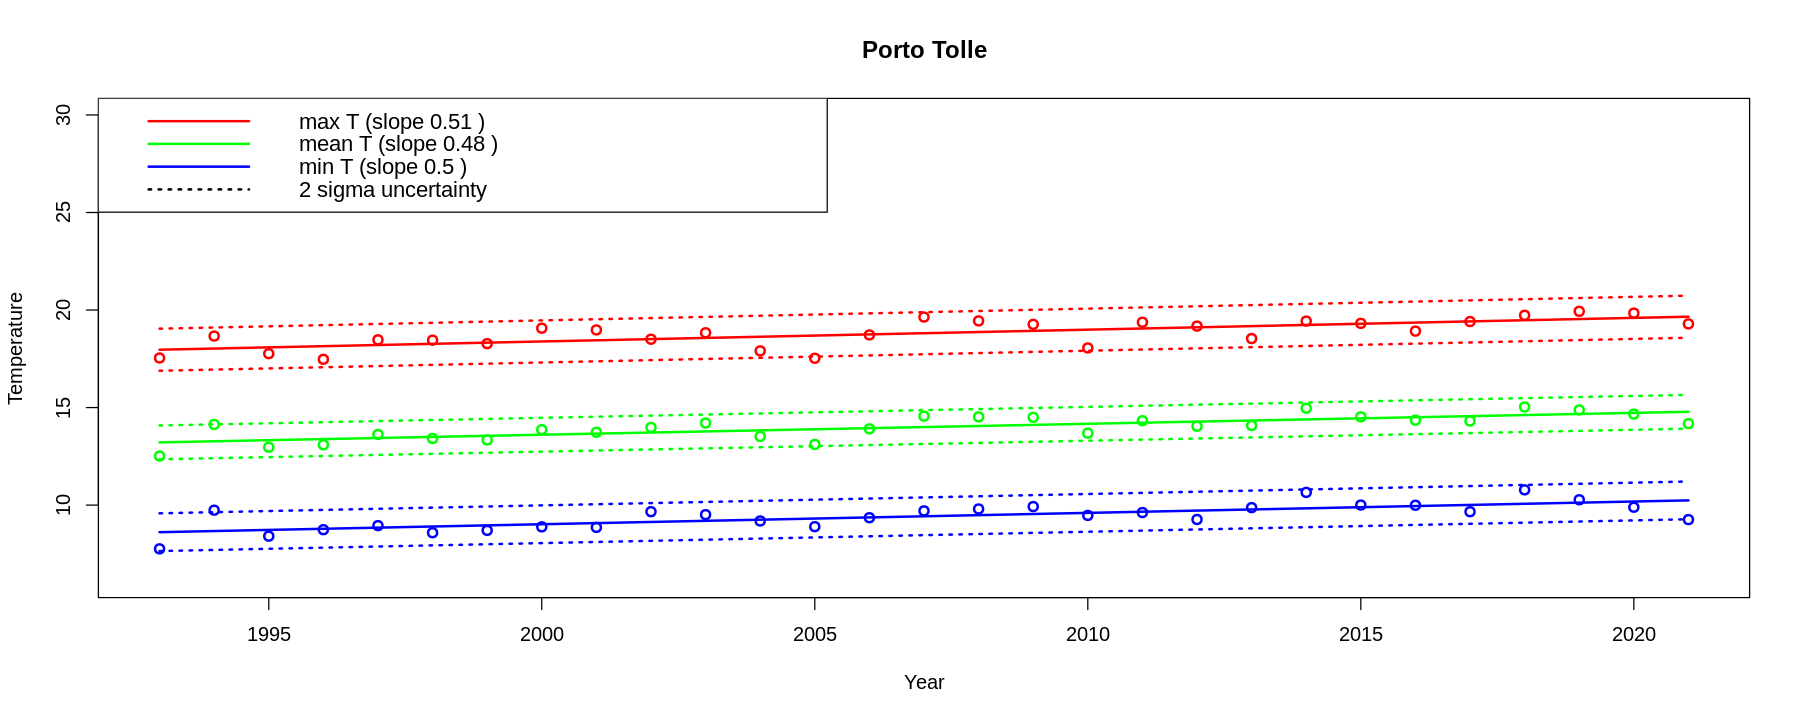

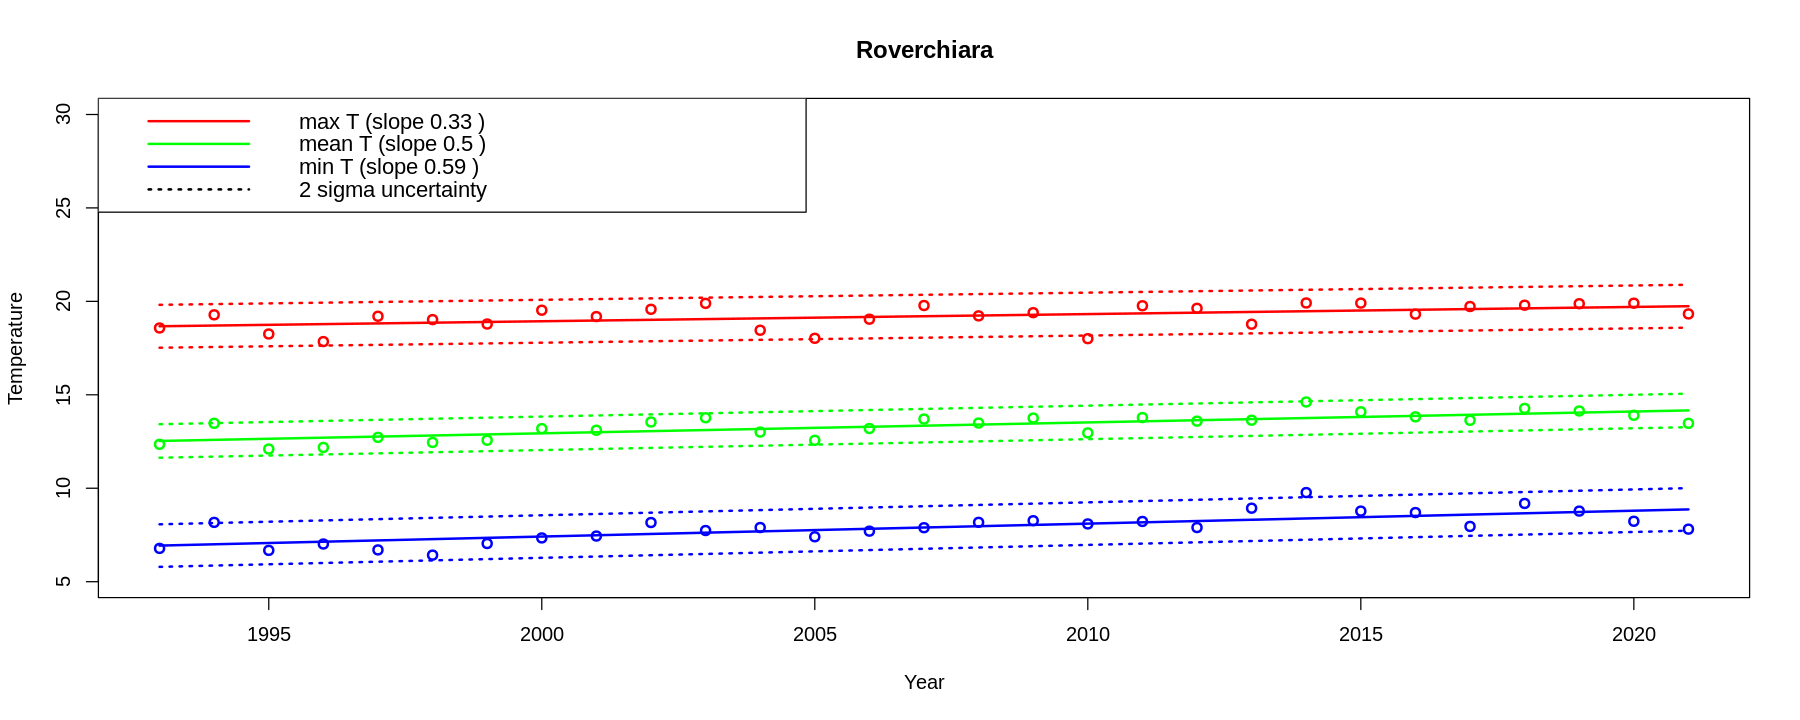

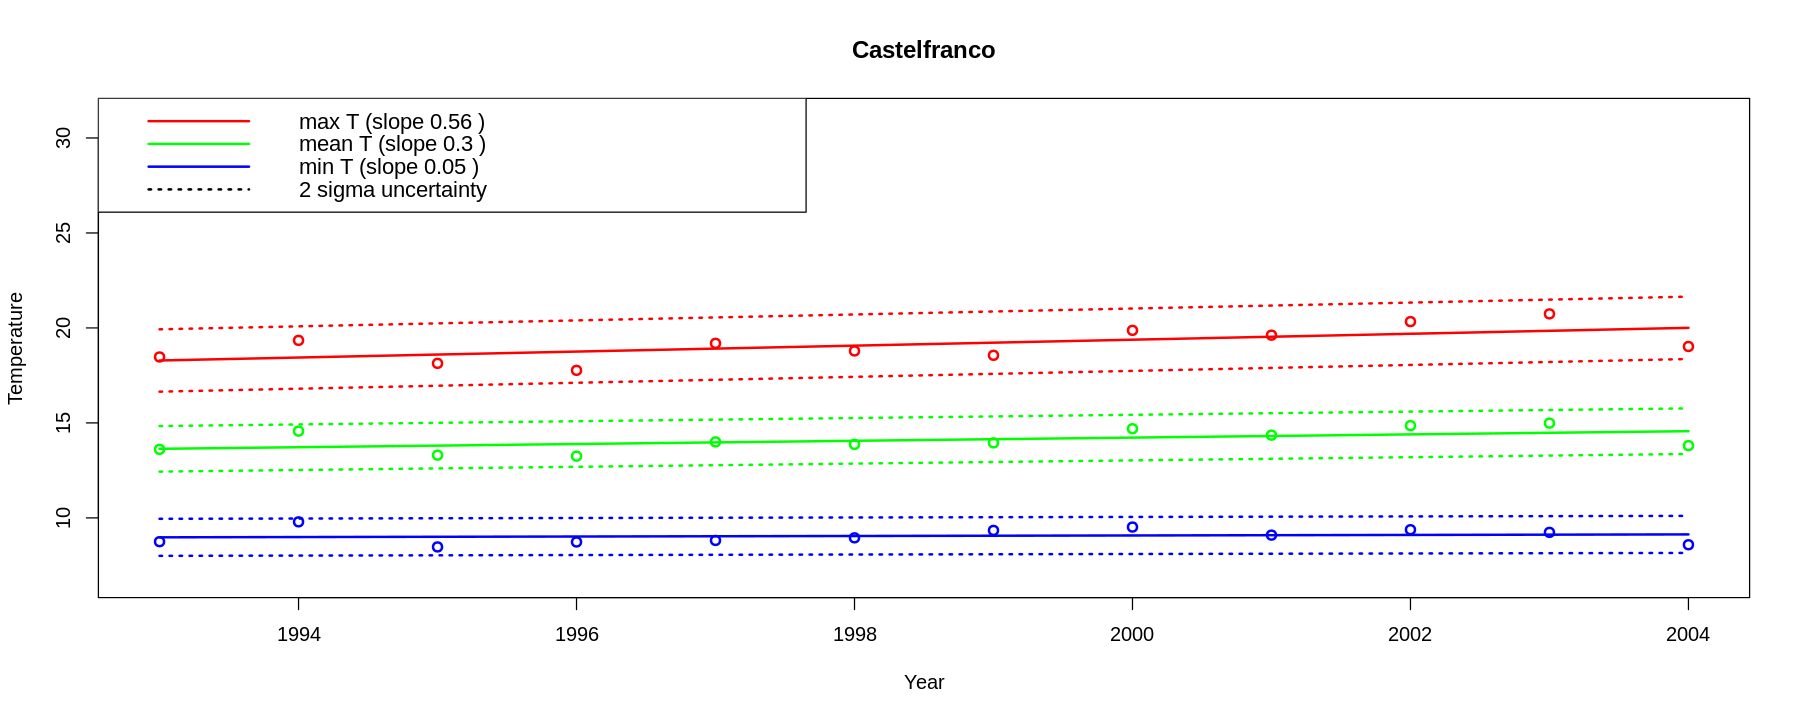

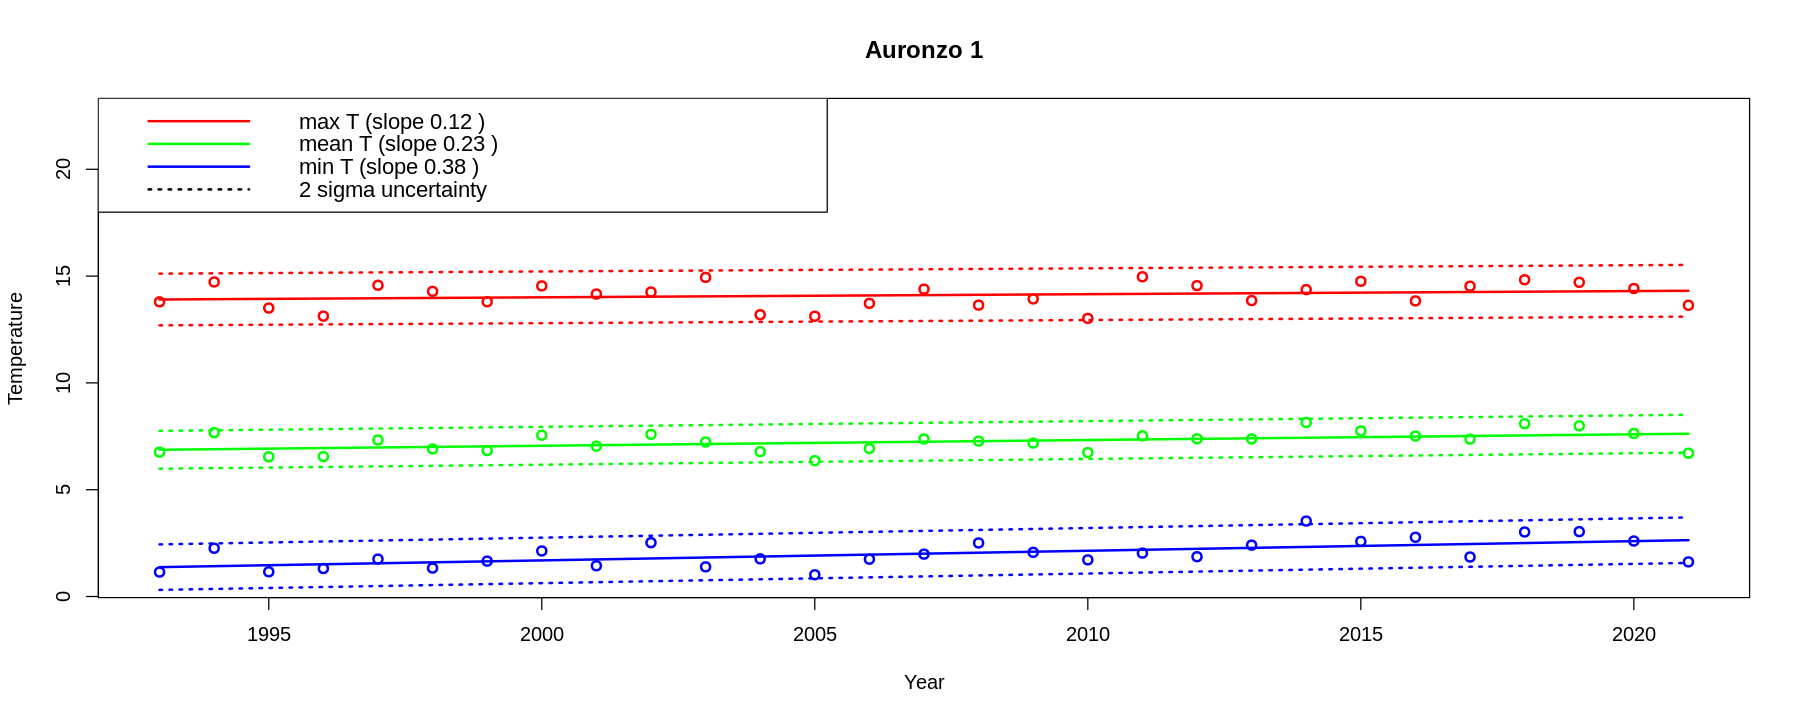

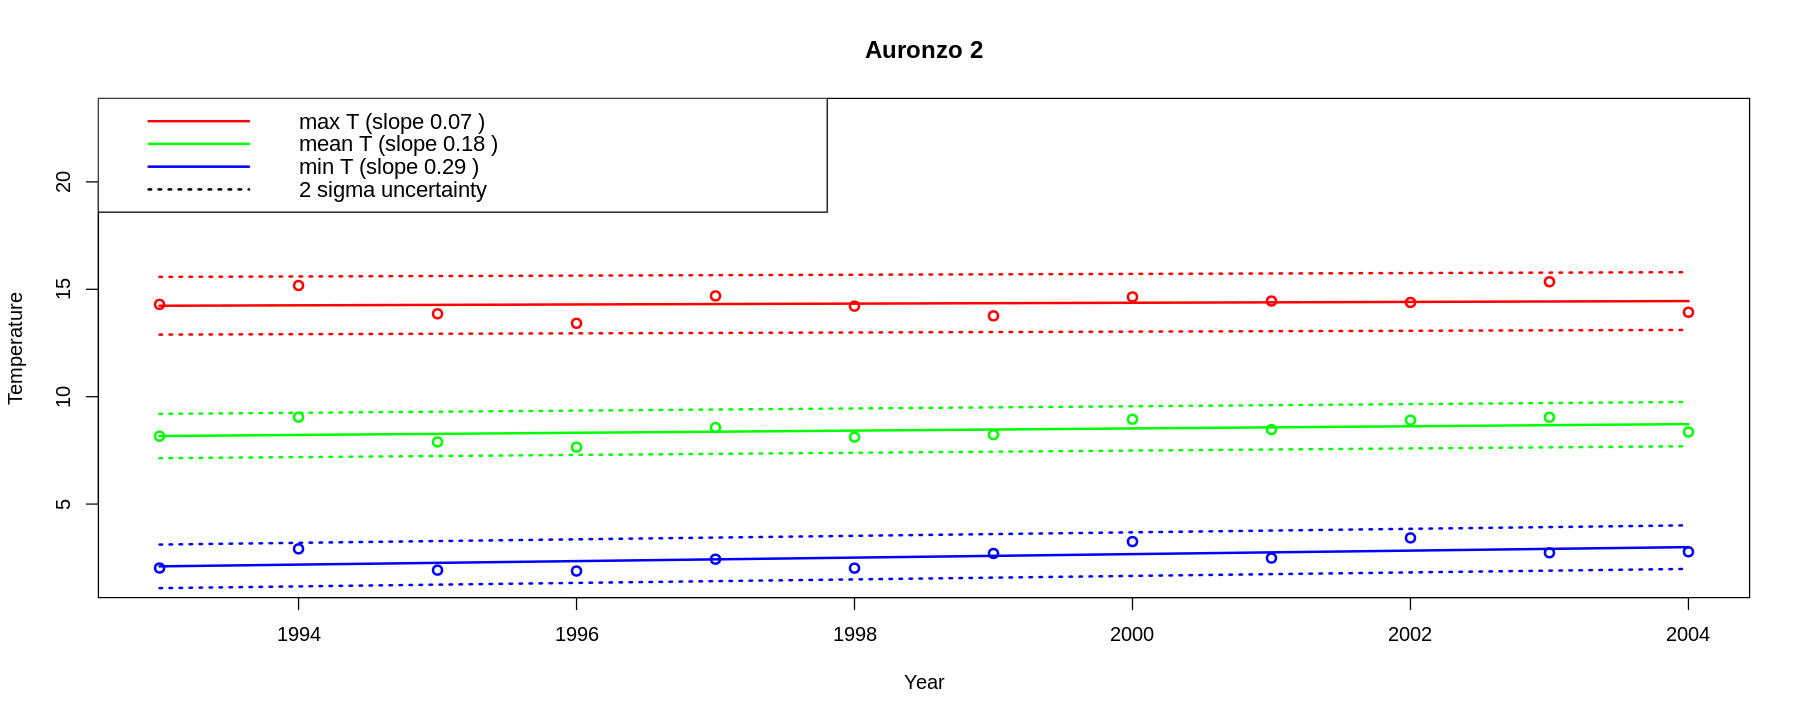

In [22]:
plot_regresions(df1_1,results_1_med,results_1_min,results_1_max,mains[1])
plot_regresions(df2_1,results_2_med,results_2_min,results_2_max,mains[2])
plot_regresions(df3_1,results_3_med,results_3_min,results_3_max,mains[3])
plot_regresions(df4_1,results_4_med,results_4_min,results_4_max,mains[4])
plot_regresions(df5_1,results_5_med,results_5_min,results_5_max,mains[5])

#### 3.  perform a Bayesian hypothesis test comparing the two results

We choose the **null hypothesis H0** to be that the mean values of slope, intercept and sigma for the constant regression are compatible with the linear regression parameters. We choose to work with a 5% level of significance.

$$H_0->parms_{linear}=params_{const}$$

In [23]:
Hypothesis_test = function(results){
    
    slope_const = unlist(results[3])[3]
    intercept_const = unlist(results[3])[1]
    sigma_const = unlist(results[3])[2]

    slope_lin_25 = data.frame(results[2])[3,1]
    slope_lin_75 = data.frame(results[2])[3,2]

    intercept_lin_25 = data.frame(results[2])[1,1]
    intercept_lin_75 = data.frame(results[2])[1,2]

    sigma_lin_25 = data.frame(results[2])[2,1]
    sigma_lin_75 = data.frame(results[2])[2,2]

    slope_bool = (slope_lin_25<slope_const & slope_const<slope_lin_75)
    intercept_bool = (intercept_lin_25<intercept_const & intercept_const<intercept_lin_75)
    sigma_bool = (sigma_lin_25<sigma_const & sigma_const<sigma_lin_75)
    H0_bool = slope_bool | intercept_bool | sigma_bool
    sentence_1=paste("The null hypothesis H0 is", H0_bool,  "for alpha=5%. \n")
    
    if (H0_bool==TRUE){
        sentence_2=paste("H0 is accepted.\n","The slope's null hypothesis is", slope_bool, "for alpha=5%. \n",
            "The intercept's null hypothesis is", intercept_bool, "for alpha=5%. \n",
            "The sigma's null hypothesis is", sigma_bool, "for alpha=5%. \n")
    }else{
        sentence_2=paste("H0 is rejected.\n")    
    }
    return(paste(sentence_1,sentence_2))
}   

In [24]:
cat(mains[1],':','\n','-------------','\n','MEAN:','\n',Hypothesis_test(results_1_med),
    '\n','MIN:','\n',Hypothesis_test(results_1_min),'\n','MAX:','\n',Hypothesis_test(results_1_max))

Porto Tolle : 
 ------------- 
 MEAN: 
 The null hypothesis H0 is FALSE for alpha=5%. 
 H0 is rejected.
 
 MIN: 
 The null hypothesis H0 is FALSE for alpha=5%. 
 H0 is rejected.
 
 MAX: 
 The null hypothesis H0 is FALSE for alpha=5%. 
 H0 is rejected.


In [25]:
cat(mains[2],':','\n','-------------','\n','MEAN:','\n',Hypothesis_test(results_2_med),
    '\n','MIN:','\n',Hypothesis_test(results_2_min),'\n','MAX:','\n',Hypothesis_test(results_2_max))

Roverchiara : 
 ------------- 
 MEAN: 
 The null hypothesis H0 is FALSE for alpha=5%. 
 H0 is rejected.
 
 MIN: 
 The null hypothesis H0 is FALSE for alpha=5%. 
 H0 is rejected.
 
 MAX: 
 The null hypothesis H0 is FALSE for alpha=5%. 
 H0 is rejected.


In [26]:
cat(mains[3],':','\n','-------------','\n','MEAN:','\n',Hypothesis_test(results_3_med),
    '\n','MIN:','\n',Hypothesis_test(results_3_min),'\n','MAX:','\n',Hypothesis_test(results_3_max))

Castelfranco : 
 ------------- 
 MEAN: 
 The null hypothesis H0 is TRUE for alpha=5%. 
 H0 is accepted.
 The slope's null hypothesis is TRUE for alpha=5%. 
 The intercept's null hypothesis is FALSE for alpha=5%. 
 The sigma's null hypothesis is FALSE for alpha=5%. 
 
 MIN: 
 The null hypothesis H0 is FALSE for alpha=5%. 
 H0 is rejected.
 
 MAX: 
 The null hypothesis H0 is FALSE for alpha=5%. 
 H0 is rejected.


In [27]:
cat(mains[4],':','\n','-------------','\n','MEAN:','\n',Hypothesis_test(results_4_med),
    '\n','MIN:','\n',Hypothesis_test(results_4_min),'\n','MAX:','\n',Hypothesis_test(results_4_max))

Auronzo 1 : 
 ------------- 
 MEAN: 
 The null hypothesis H0 is FALSE for alpha=5%. 
 H0 is rejected.
 
 MIN: 
 The null hypothesis H0 is FALSE for alpha=5%. 
 H0 is rejected.
 
 MAX: 
 The null hypothesis H0 is FALSE for alpha=5%. 
 H0 is rejected.


In [28]:
cat(mains[5],':','\n','-------------','\n','MEAN:','\n',Hypothesis_test(results_5_med),
    '\n','MIN:','\n',Hypothesis_test(results_5_min),'\n','MAX:','\n',Hypothesis_test(results_5_max))

Auronzo 2 : 
 ------------- 
 MEAN: 
 The null hypothesis H0 is FALSE for alpha=5%. 
 H0 is rejected.
 
 MIN: 
 The null hypothesis H0 is TRUE for alpha=5%. 
 H0 is accepted.
 The slope's null hypothesis is TRUE for alpha=5%. 
 The intercept's null hypothesis is FALSE for alpha=5%. 
 The sigma's null hypothesis is FALSE for alpha=5%. 
 
 MAX: 
 The null hypothesis H0 is FALSE for alpha=5%. 
 H0 is rejected.


#### 5. do you see correlations between data measured at different stations ?


We will base our analysis on the comparisson of the mean slopes for maximum, average and minimum temperature per year in the different stations.

In [29]:
slope_mean_1 = unlist(results_1_med[1])[3]
slope_mean_2 = unlist(results_2_med[1])[3]
slope_mean_3 = unlist(results_3_med[1])[3]
slope_mean_4 = unlist(results_4_med[1])[3]
slope_mean_5 = unlist(results_5_med[1])[3]

slope_mean=c(slope_mean_1,slope_mean_2,slope_mean_3,slope_mean_4,slope_mean_5)

slope_min_1 = unlist(results_1_min[1])[3]
slope_min_2 = unlist(results_2_min[1])[3]
slope_min_3 = unlist(results_3_min[1])[3]
slope_min_4 = unlist(results_4_min[1])[3]
slope_min_5 = unlist(results_5_min[1])[3]

slope_min=c(slope_min_1,slope_min_2,slope_min_3,slope_min_4,slope_min_5)

slope_max_1 = unlist(results_1_max[1])[3]
slope_max_2 = unlist(results_2_max[1])[3]
slope_max_3 = unlist(results_3_max[1])[3]
slope_max_4 = unlist(results_4_max[1])[3]
slope_max_5 = unlist(results_5_max[1])[3]

slope_max=c(slope_max_1,slope_max_2,slope_max_3,slope_max_4,slope_max_5)

In [30]:
stats_1=data.frame(MEAN=slope_mean,MIN=slope_min,MAX=slope_max,row.names=mains)
stats_1

MEAN      MIN        MAX      
Porto Tolle  0.4769498 0.49584760 0.5149478
Roverchiara  0.4969809 0.58856849 0.3263249
Castelfranco 0.3043355 0.05035805 0.5636563
Auronzo 1    0.2285885 0.38402812 0.1244438
Auronzo 2    0.1822845 0.29357855 0.0714714

In [31]:
colMeans(stats_1)

MEAN       MIN       MAX 
0.3378279 0.3624762 0.3201688

As it can be seen, for all the stations, the data follows a linear regression with positive slope. The slopes are not compatible with eachother for a 95% confidence level but all of them fall into the range [0.1-0.5].

It seems that there could be some kind of correlation between latitude and slope: the more northern the station, the lower the slope.

## Part 2

### Analysis of the evolution of the annual difference of the min, max and daily average temperature over time (1993 - 2021):


#### Perform an analysis using a Bayesian linear regression with JAGS or STAN

#### Assuming you found an increasing trend in the temperature, compute it considering 4-years intervals and compare the results with those shown in SNPA (Sistema Nazionale per la Protezione Ambiente) in [1].

In [32]:
add_group = function(df, each){
    df$group = rep(1:as.integer((length(df$year)/each)+1), times=1, each=each)[1:length(df$year)]
    df_ = df |> group_by(group) |> summarise(Tmin_avg = mean(Tmin_avg), Tmed_avg = mean(Tmed_avg), Tmax_avg = mean(Tmax_avg), year=mean(year))
    return (df_)
}

In [33]:
each = 4
df1_2 = add_group(df1_1, each)
df2_2 = add_group(df2_1, each)
df3_2 = add_group(df3_1, each)
df4_2 = add_group(df4_1, each)
df5_2 = add_group(df5_1, each)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 8
   Unobserved stochastic nodes: 3
   Total graph size: 42

Initializing model

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 8
   Unobserved stochastic nodes: 2
   Total graph size: 17

Initializing model



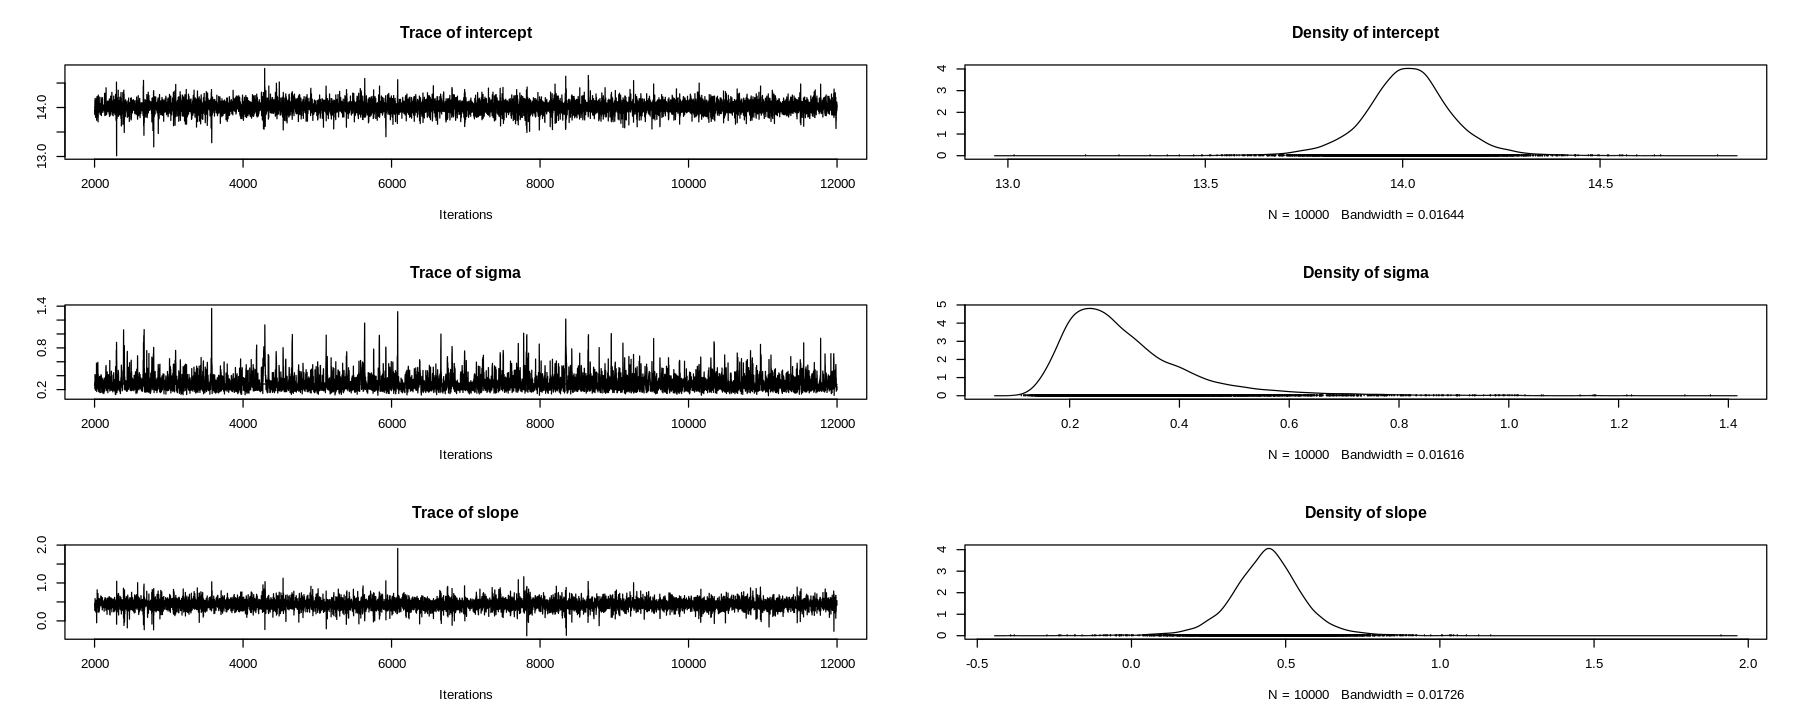

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 8
   Unobserved stochastic nodes: 3
   Total graph size: 42

Initializing model

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 8
   Unobserved stochastic nodes: 2
   Total graph size: 17

Initializing model

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 3
   Unobserved stochastic nodes: 3
   Total graph size: 22

Initializing model

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 3
   Unobserved stochastic nodes: 2
   Total graph size: 12

Initializing model

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 8
   Unobserved stochastic nodes: 3
   Total graph 

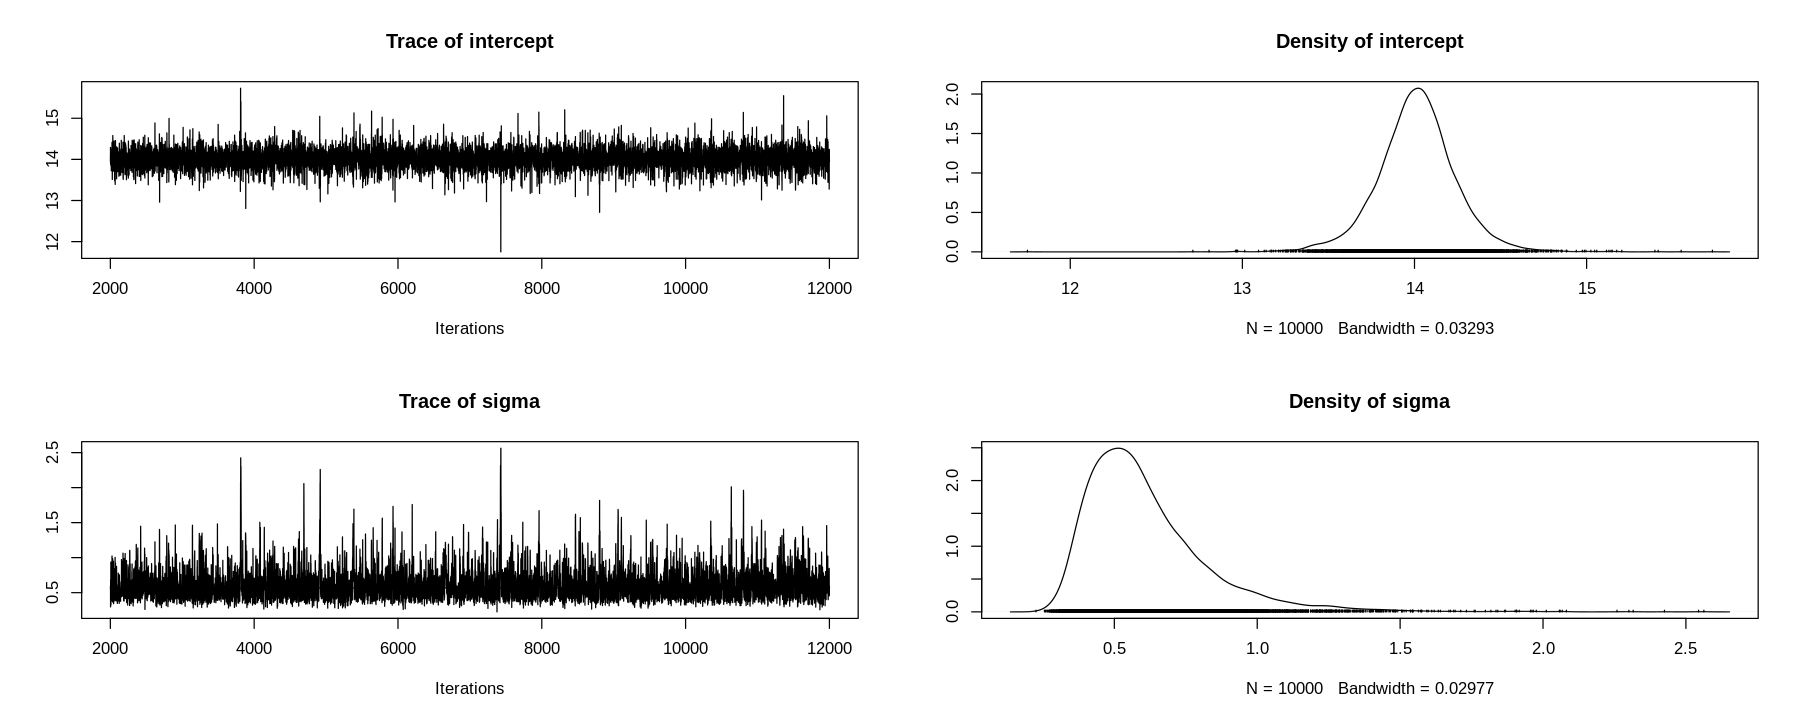

In [34]:
## results for mean T
results_1_med_2=MCMC(df1_2,plot=TRUE,temperature=df1_2$Tmed_avg)
results_2_med_2=MCMC(df2_2,plot=FALSE,temperature=df2_2$Tmed_avg)
results_3_med_2=MCMC(df3_2,plot=FALSE,temperature=df3_2$Tmed_avg)
results_4_med_2=MCMC(df4_2,plot=FALSE,temperature=df4_2$Tmed_avg)
results_5_med_2=MCMC(df5_2,plot=FALSE,temperature=df5_2$Tmed_avg)

##results for min T
results_1_min_2=MCMC(df1_2,plot=FALSE,temperature=df1_2$Tmin_avg)
results_2_min_2=MCMC(df2_2,plot=FALSE,temperature=df2_2$Tmin_avg)
results_3_min_2=MCMC(df3_2,plot=FALSE,temperature=df3_2$Tmin_avg)
results_4_min_2=MCMC(df4_2,plot=FALSE,temperature=df4_2$Tmin_avg)
results_5_min_2=MCMC(df5_2,plot=FALSE,temperature=df5_2$Tmin_avg)

##results for max T
results_1_max_2=MCMC(df1_2,plot=FALSE,temperature=df1_2$Tmax_avg)
results_2_max_2=MCMC(df2_2,plot=FALSE,temperature=df2_2$Tmax_avg)
results_3_max_2=MCMC(df3_2,plot=FALSE,temperature=df3_2$Tmax_avg)
results_4_max_2=MCMC(df4_2,plot=FALSE,temperature=df4_2$Tmax_avg)
results_5_max_2=MCMC(df5_2,plot=FALSE,temperature=df5_2$Tmax_avg)

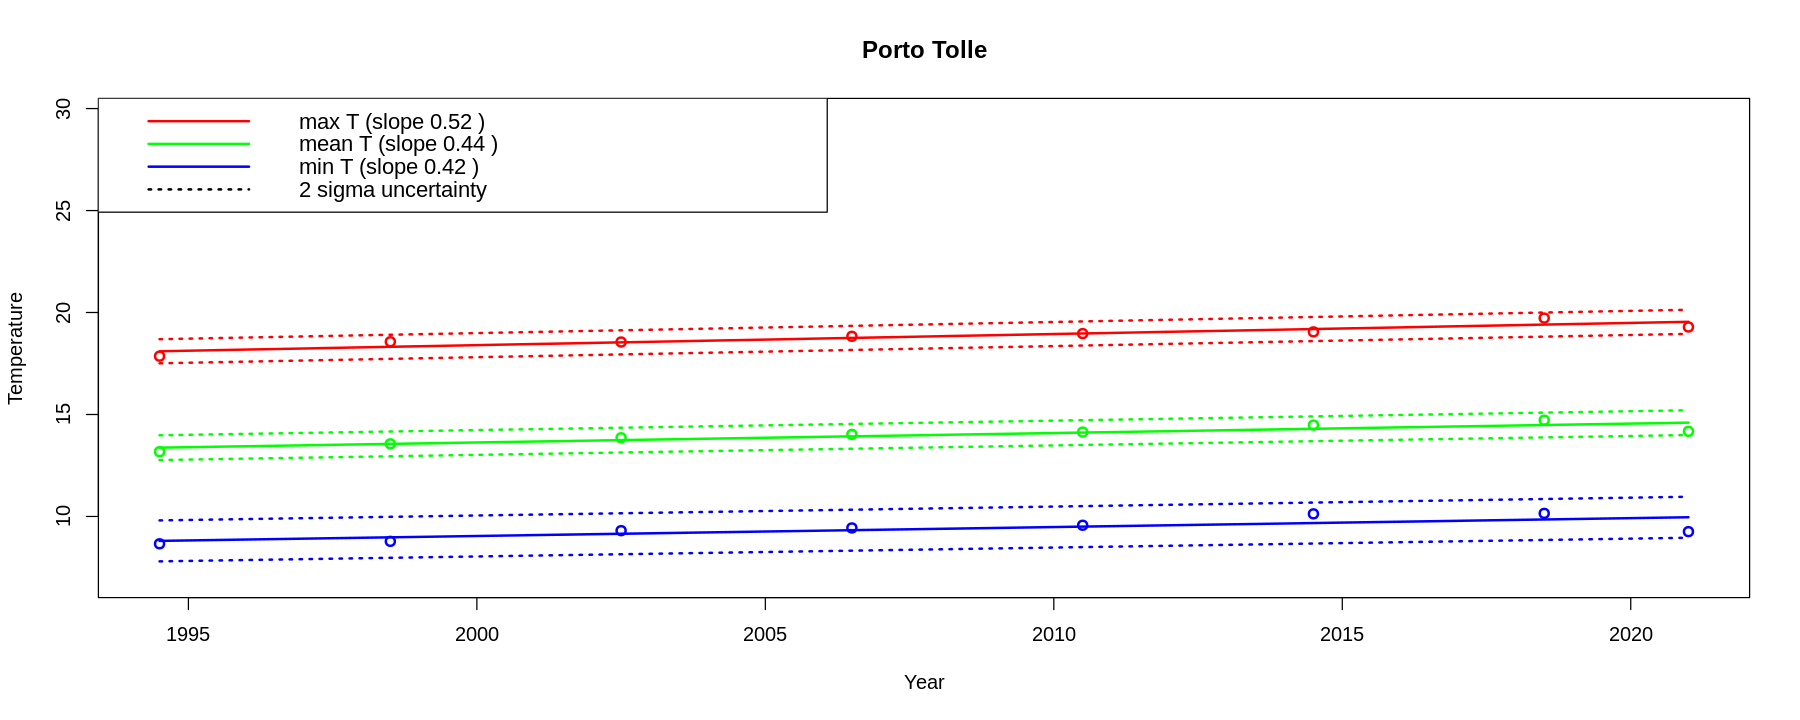

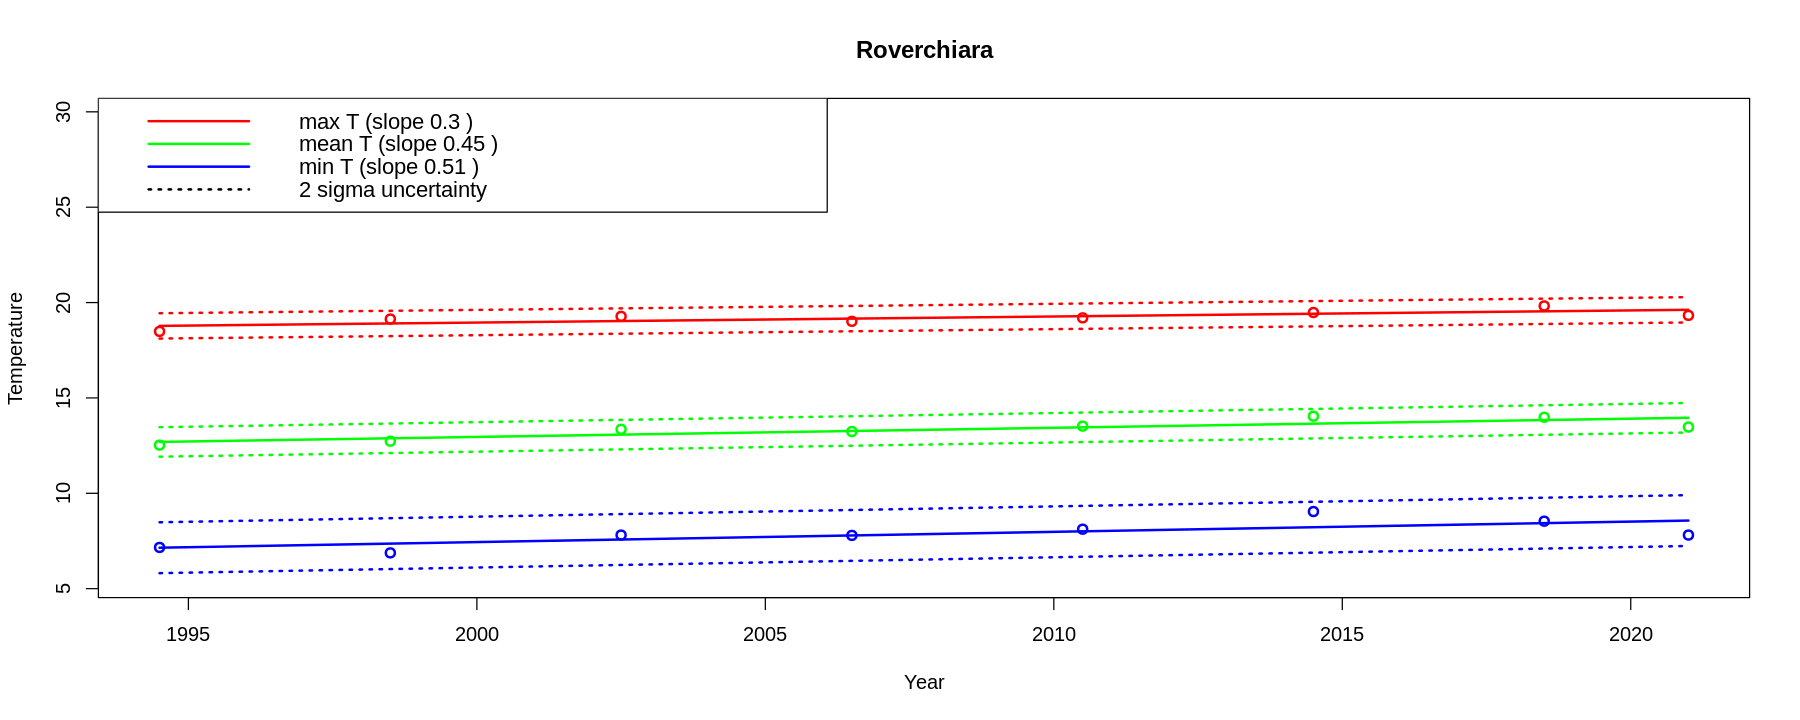

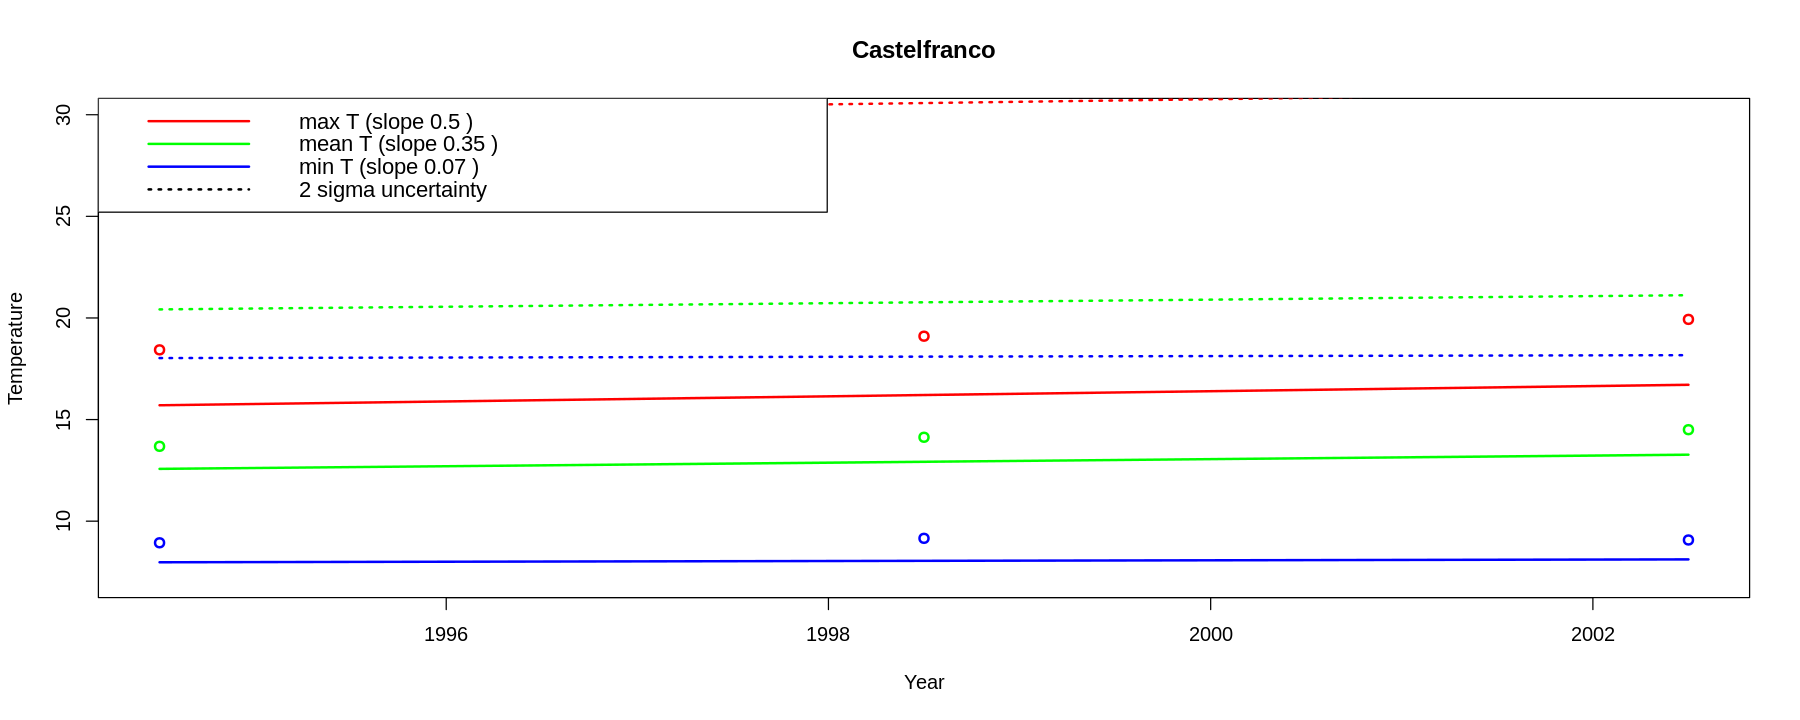

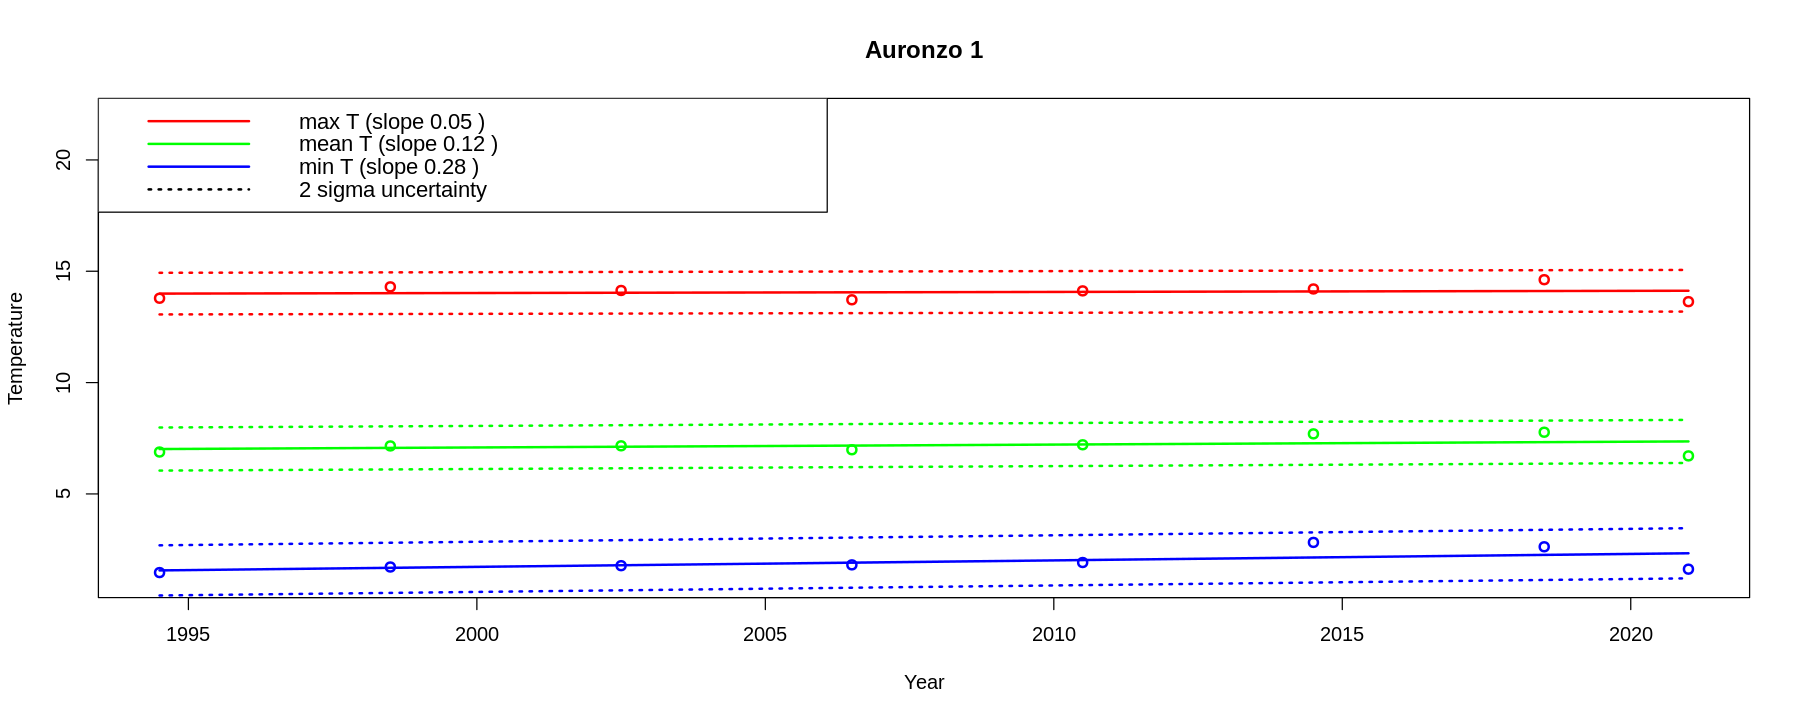

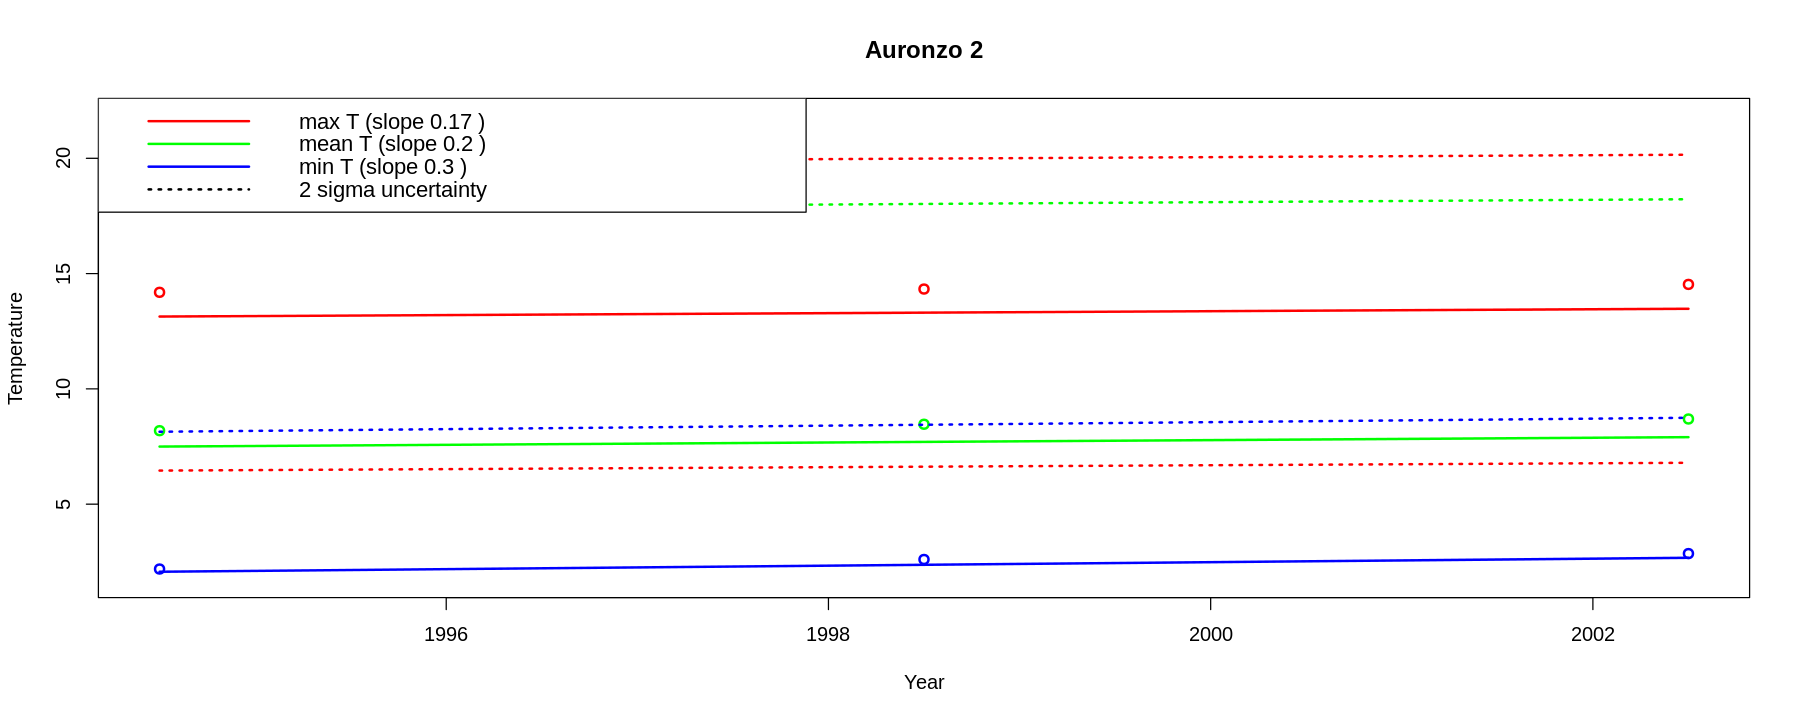

In [35]:
plot_regresions(df1_2,results_1_med_2,results_1_min_2,results_1_max_2,mains[1])
plot_regresions(df2_2,results_2_med_2,results_2_min_2,results_2_max_2,mains[2])
plot_regresions(df3_2,results_3_med_2,results_3_min_2,results_3_max_2,mains[3])
plot_regresions(df4_2,results_4_med_2,results_4_min_2,results_4_max_2,mains[4])
plot_regresions(df5_2,results_5_med_2,results_5_min_2,results_5_max_2,mains[5])

In [36]:
slope_mean_1_2 = unlist(results_1_med_2[1])[3]
slope_mean_2_2 = unlist(results_2_med_2[1])[3]
slope_mean_3_2 = unlist(results_3_med_2[1])[3]
slope_mean_4_2 = unlist(results_4_med_2[1])[3]
slope_mean_5_2 = unlist(results_5_med_2[1])[3]

slope_mean_2=c(slope_mean_1_2,slope_mean_2_2,slope_mean_4_2)

slope_min_1_2 = unlist(results_1_min_2[1])[3]
slope_min_2_2 = unlist(results_2_min_2[1])[3]
slope_min_3_2 = unlist(results_3_min_2[1])[3]
slope_min_4_2 = unlist(results_4_min_2[1])[3]
slope_min_5_2 = unlist(results_5_min_2[1])[3]

slope_min_2=c(slope_min_1_2,slope_min_2_2,slope_min_4_2)

slope_max_1_2 = unlist(results_1_max_2[1])[3]
slope_max_2_2 = unlist(results_2_max_2[1])[3]
slope_max_3_2 = unlist(results_3_max_2[1])[3]
slope_max_4_2 = unlist(results_4_max_2[1])[3]
slope_max_5_2 = unlist(results_5_max_2[1])[3]

slope_max_2=c(slope_max_1_2,slope_max_2_2,slope_max_4_2)

In [37]:
stats_2 = data.frame(MEAN=slope_mean_2,MIN=slope_min_2,MAX=slope_max_2,row.names=c(mains[1],mains[2],mains[4]))
stats_2

MEAN      MIN       MAX       
Porto Tolle 0.4396343 0.4154593 0.51746323
Roverchiara 0.4546356 0.5103298 0.30221024
Auronzo 1   0.1227469 0.2758931 0.04612146

In [38]:
colMeans(stats_2)

MEAN       MIN       MAX 
0.3390056 0.4005607 0.2885983

SNPA values (1981-2019):

**MEAN** increments 0.38 $\pm$ 0.05 each 10 years $\rightarrow$ SNPA_slope_mean = 0.038 $\pm$ 0.005

**MIN** increments 0.34 $\pm$ 0.04 each 10 years $\rightarrow$ SNPA_slope_mean = 0.034 $\pm$ 0.004

**MAX** increments 0.42 $\pm$ 0.06 each 10 years $\rightarrow$ SNPA_slope_mean = 0.042 $\pm$ 0.006

It can clearly be seen that our results differ by an order of magnitude from those shown in SNPA. This could be due to the fact that their data includes temperatures from 1981 and we start from 1993, 10 years later. During these 10 years the increasing tendency was not that noticeable. Nevertheless, we did not expect such different results.

## Part 3

#### Using the forecast R package [2], which provides methods and tools for displaying and analysing univariate time series, analyze the data. 

#### The library contains also the ARIMA (Autoregressive Integrated Moving Average), which allows to perform the equivalent of a linear regression in time series, where data is not stationary.

#### Analyze your data and try to predict the evolution in the next years (average the data over multiple years, if needed).


_About ARIMA_

ARIMA (Auto Regressive Integrated Moving Average) is a widely used method used to for predicting future points of a time-series. ARIMA is useful to study data sets which are:
- NON stationary: Data depends on the timing. (e.g. In summer is hotter than in winter). Its mean and variance are not constant over the entire set.
- Autocorrelation: A set of observantion is related to itself among the timeline.

This method is based in three models: AR (Auto Regresive), I (Integrated) and MA (Moving Average).
- Auto Regresive: A model that takes into account the autocorrelation. A point depends on a certain number (p) of previous points.
$$ Y_t=\beta_1+\phi_1Y_{t-1}+\phi_2Y_{t-2}+...+\phi_pY_{t-p} $$  

- Integrated: To be able to predict NON stationary data, the model does the diference between consecutive points d times in order to work with more stationary sets.  

- Moving Average: Used to reduce the noise in the time series. It works similarly as AR, with an hyperparameter that defines the ammout of previous points taken into account (q). $\epsilon$ represents the residual errors.
$$ Y_t=\beta_2+\omega_1\epsilon_{t-1}+\omega_2\epsilon_{t-2}+...+\omega_q\epsilon_{t-q} $$  

In other to select the best models(i.e. the best hyperparameters p,d and q) we will use the autoarima function. Afterwards the functon forecast will be used to predict the future data.  

Up to now we have worked with the average data of each year. This was a requirement in order to compute the linear regression since, in this way, the data was stationary and non autocorrelated. Now we will also be able to study the data monthly since the seasonal behaviour is not a limiting factor for ARIMA.

We start by forecasting from anual data.

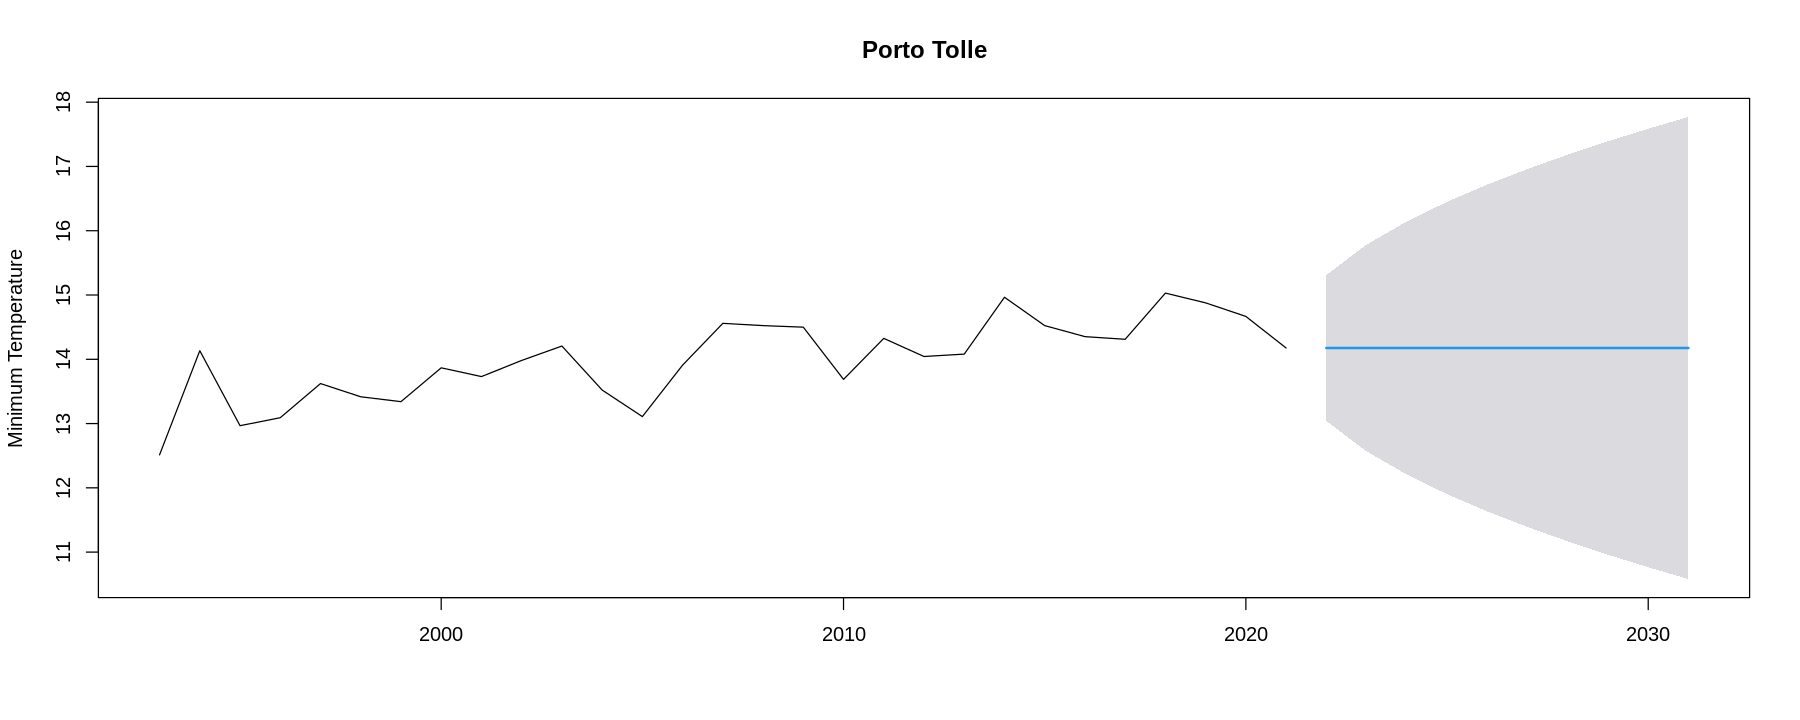

In [39]:
tsdata = ts(df1_1,start=c(1993))

modelo_min = auto.arima(tsdata[,3], seasonal = TRUE)
sum_min = summary(modelo_min)
pronostico_min = forecast(modelo_min, level=95)
plot(pronostico_min, main='Porto Tolle',ylab="Minimum Temperature")

As we see that the uncertainty is high since the data is not very regular, we will average along 3 years so that the linear prediction we get is more adecuate.

In [40]:
add_group = function(df, each){
    df$group = rep(1:as.integer((length(df$year)/each)+1), times=1, each=each)[1:length(df$year)]
    df_ = df |> group_by(group) |> summarise(Tmin = mean(Tmin_avg), Tmed = mean(Tmed_avg), Tmax = mean(Tmax_avg), yean_avg=mean(year))
    return (df_)
}

In [41]:
each = 3
df1_3 = add_group(df1_1, each)
df2_3 = add_group(df2_1, each)
df3_3 = add_group(df3_1, each)
df4_3 = add_group(df4_1, each)
df5_3 = add_group(df5_1, each)

In [42]:
ARIMA = function(data, main_num){
    mains=c('Porto Tolle','Roverchiara','Castelfranco','Auronzo 1','Auronzo 2')
    
    tsdata = ts(data,start=1993, frequency = 1/3)

    modelo_min = auto.arima(tsdata[,2])
    sum_min = summary(modelo_min)
    pronostico_min = forecast(modelo_min,  level=95)
    plot(pronostico_min, main=mains[main_num],ylab="Minimum Temperature")
    
    modelo_med = auto.arima(tsdata[,3])
    sum_med = summary(modelo_med)
    pronostico_med = forecast(modelo_med,  level=95)
    plot(pronostico_med, main=mains[main_num],ylab="Average Temperature")
    
    modelo_max = auto.arima(tsdata[,4])
    sum_max = summary(modelo_max)
    pronostico_max = forecast(modelo_max, level=95)
    plot(pronostico_max, main=mains[main_num],ylab="Maximum Temperature")    

    #return(c(sum_min, sum_med, sum_max))
}

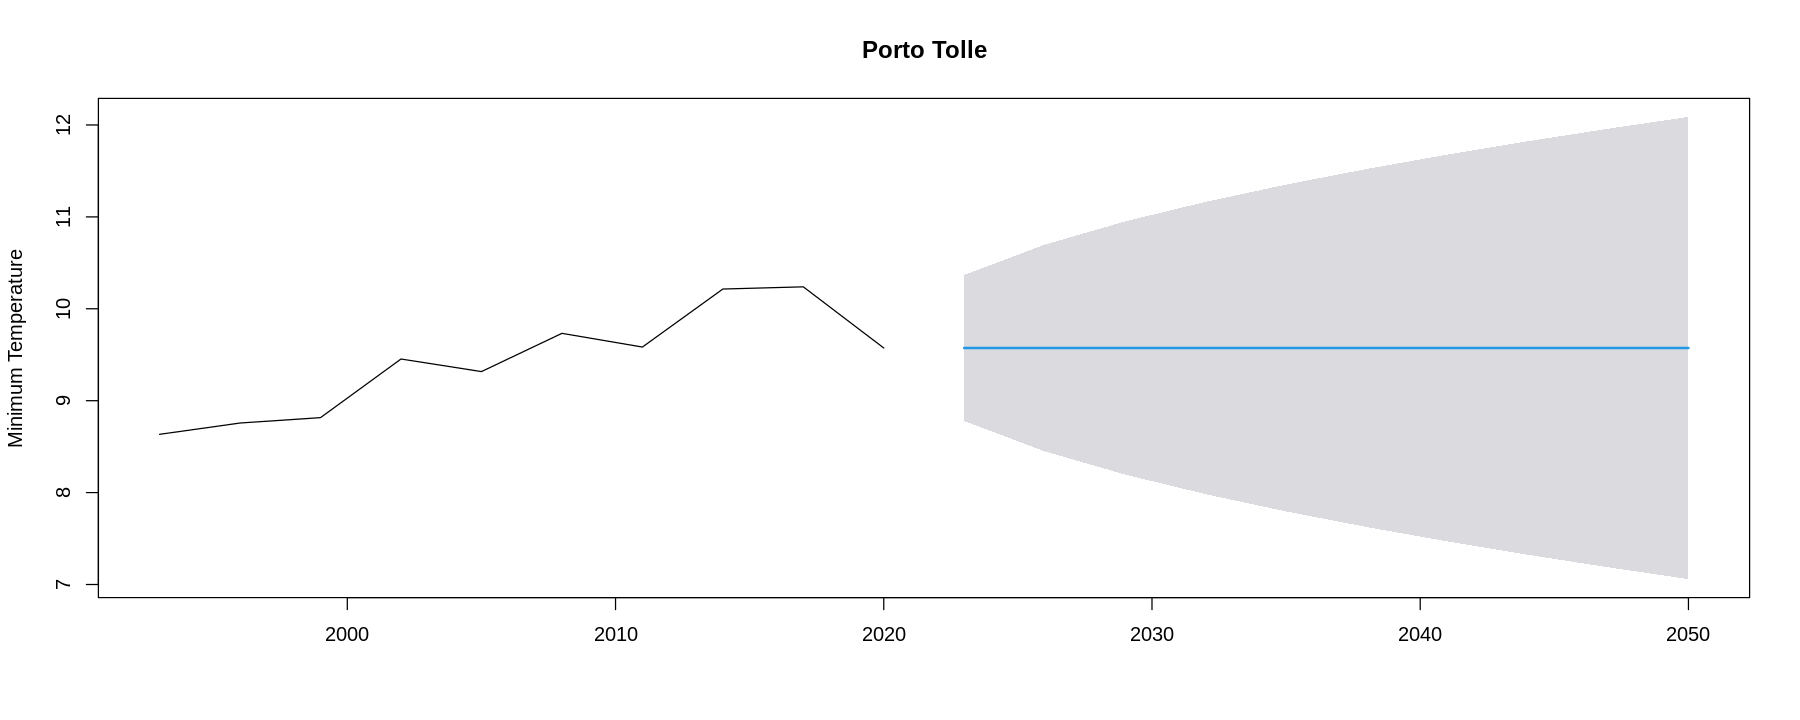

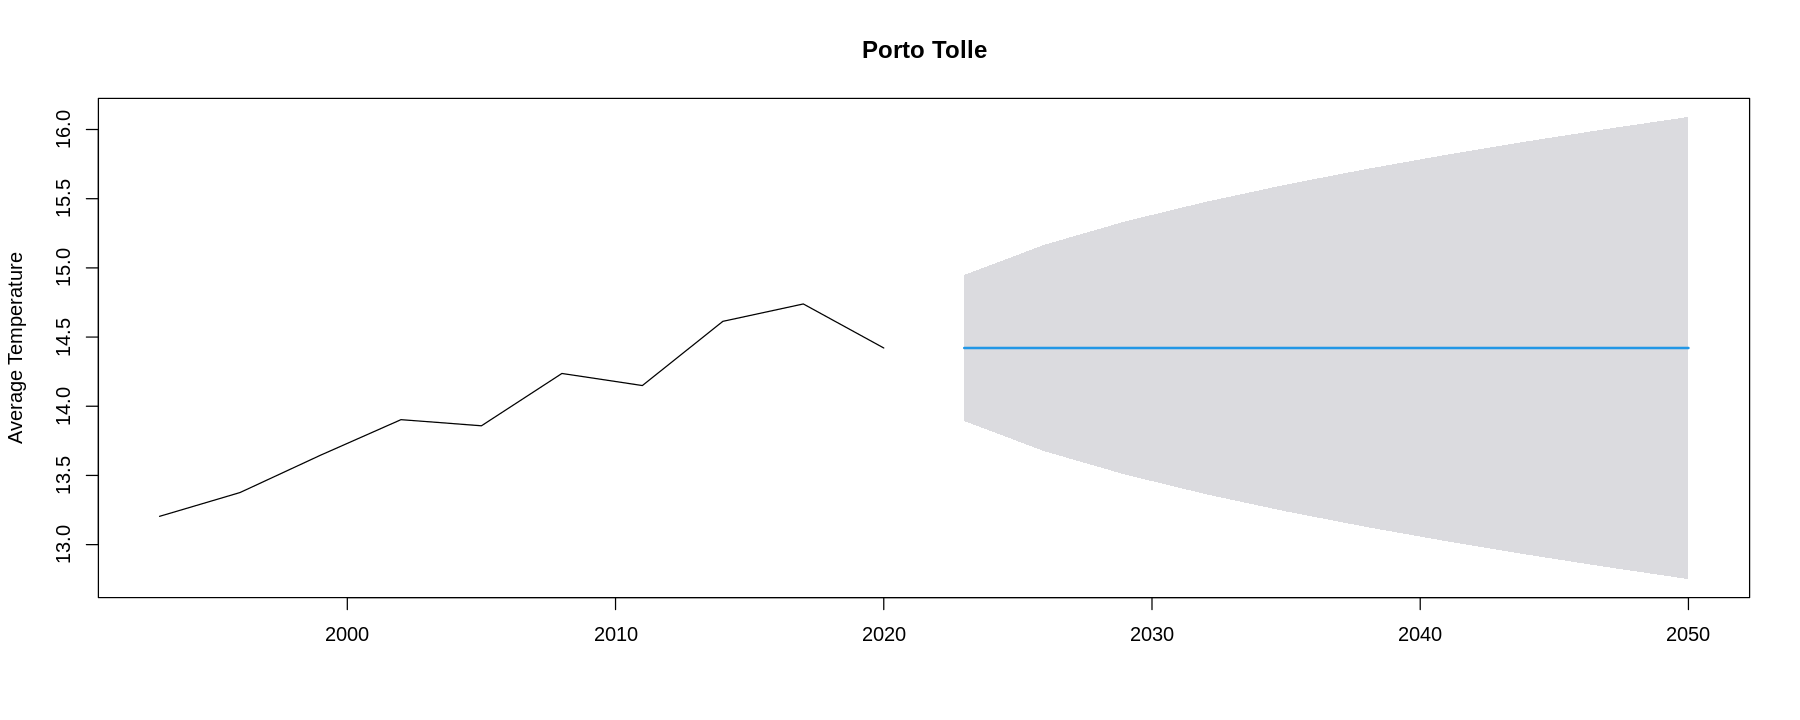

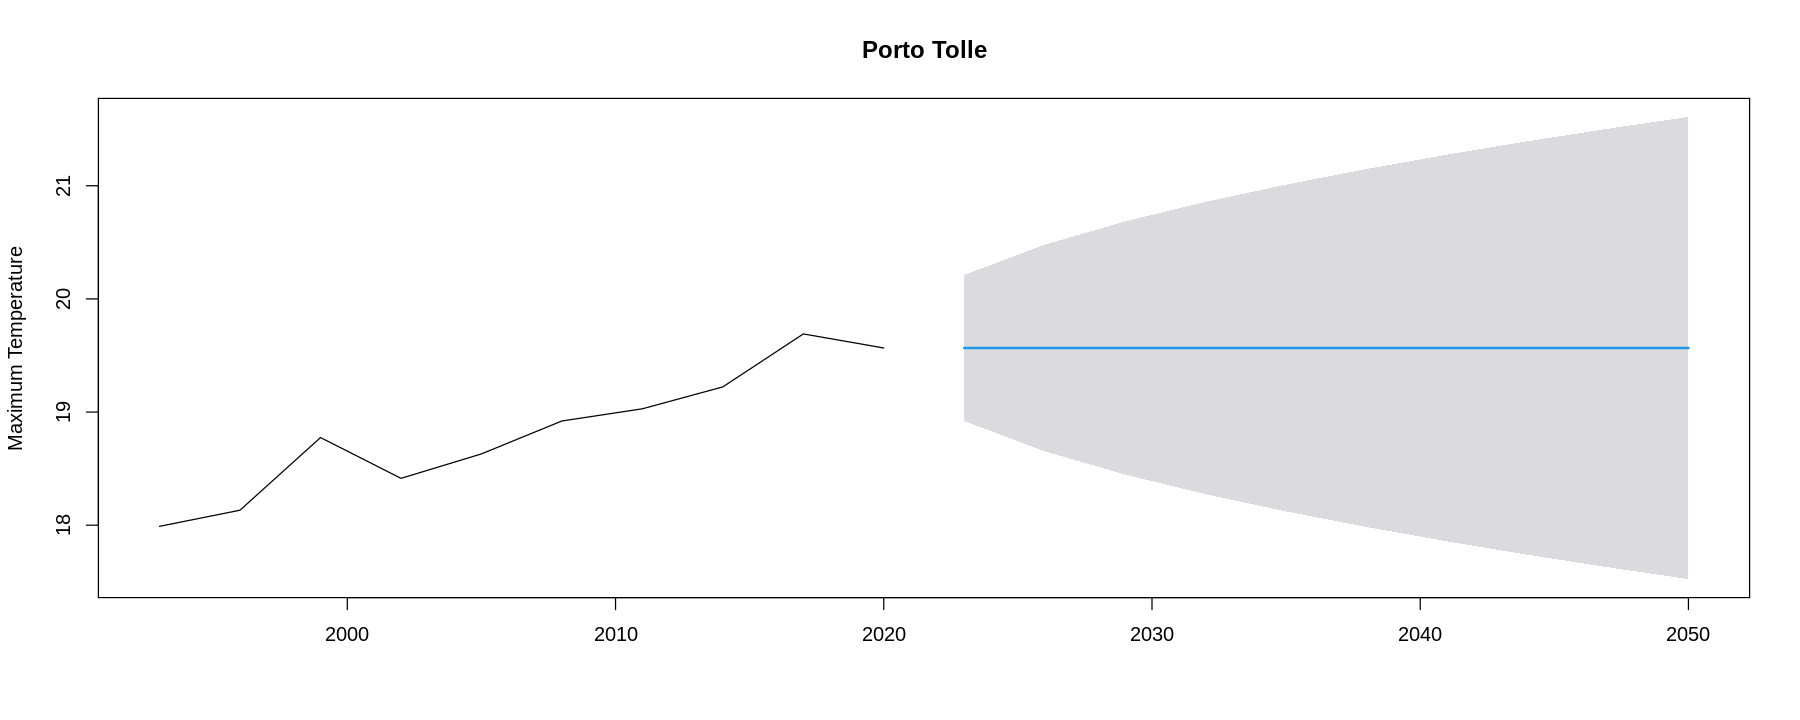

In [43]:
ARIMA(df1_3, 1)

Even when using the average every 3 years, the uncertainty is too big.

Finally, we have done the same analysis monthly, to appreciate the seasonal behaviour.

In [44]:
ARIMA = function(data, main_num){
    mains=c('Porto Tolle','Roverchiara','Castelfranco','Auronzo 1','Auronzo 2')
    
    tsdata = ts(data,start=c(1993,1),frequency=12)

    modelo_min = auto.arima(tsdata[,3], seasonal = TRUE)
    sum_min = summary(modelo_min)
    pronostico_min = forecast(modelo_min,4*12, level=95)
    plot(pronostico_min, main=mains[main_num],ylab="Minimum Temperature")
    
    modelo_med = auto.arima(tsdata[,4], seasonal = TRUE)
    sum_med = summary(modelo_med)
    pronostico_med = forecast(modelo_med,4*12, level=95)
    plot(pronostico_med, main=mains[main_num],ylab="Average Temperature")
    
    modelo_max = auto.arima(tsdata[,5], seasonal = TRUE)
    sum_max = summary(modelo_max)
    pronostico_max = forecast(modelo_max,4*12, level=95)
    plot(pronostico_max, main=mains[main_num],ylab="Maximum Temperature")    

}

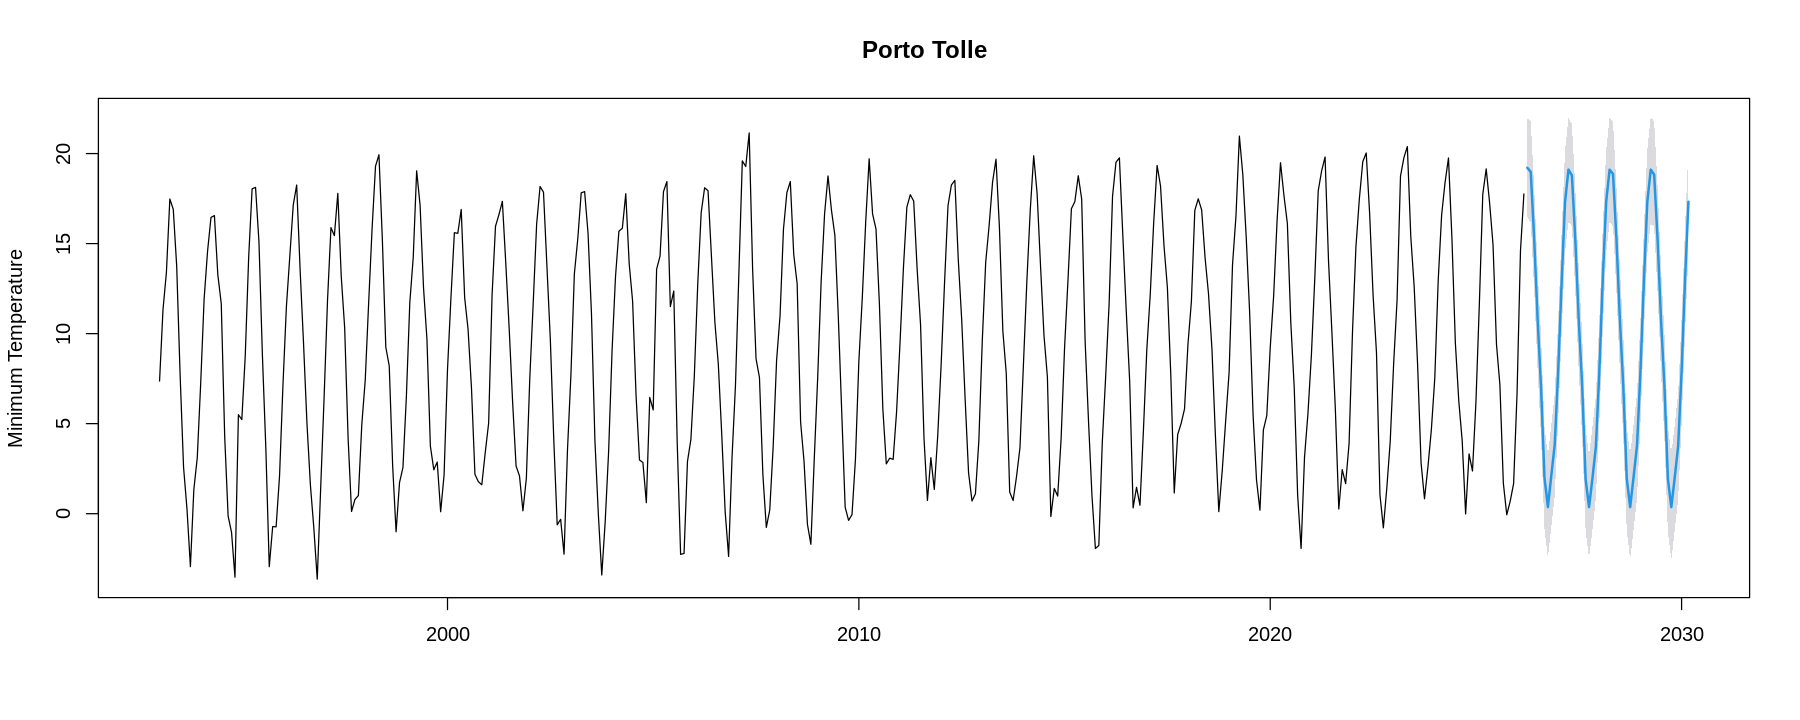

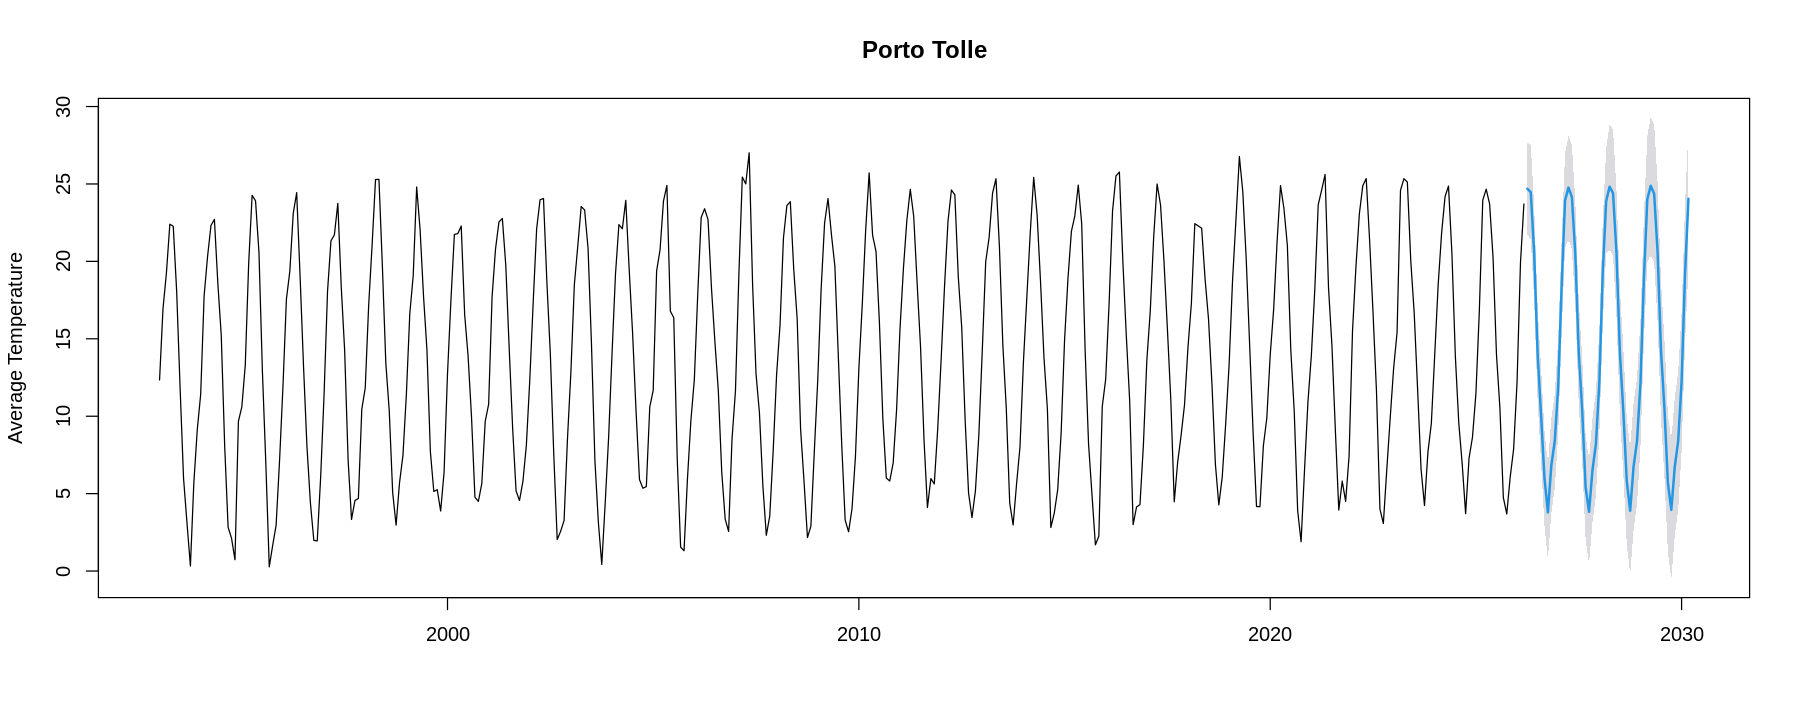

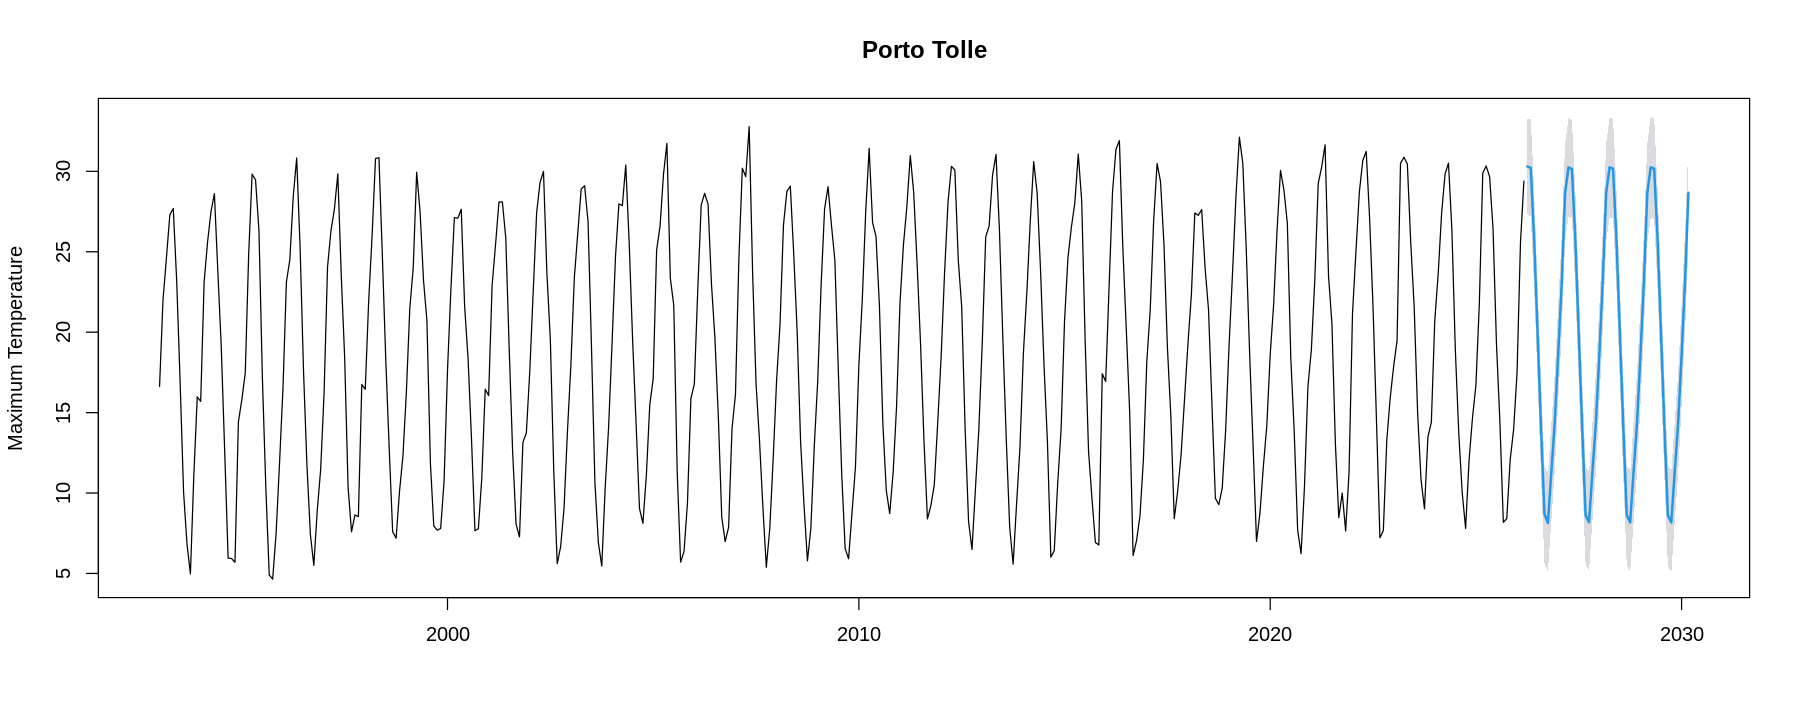

In [45]:
ARIMA(df1_0, 1)

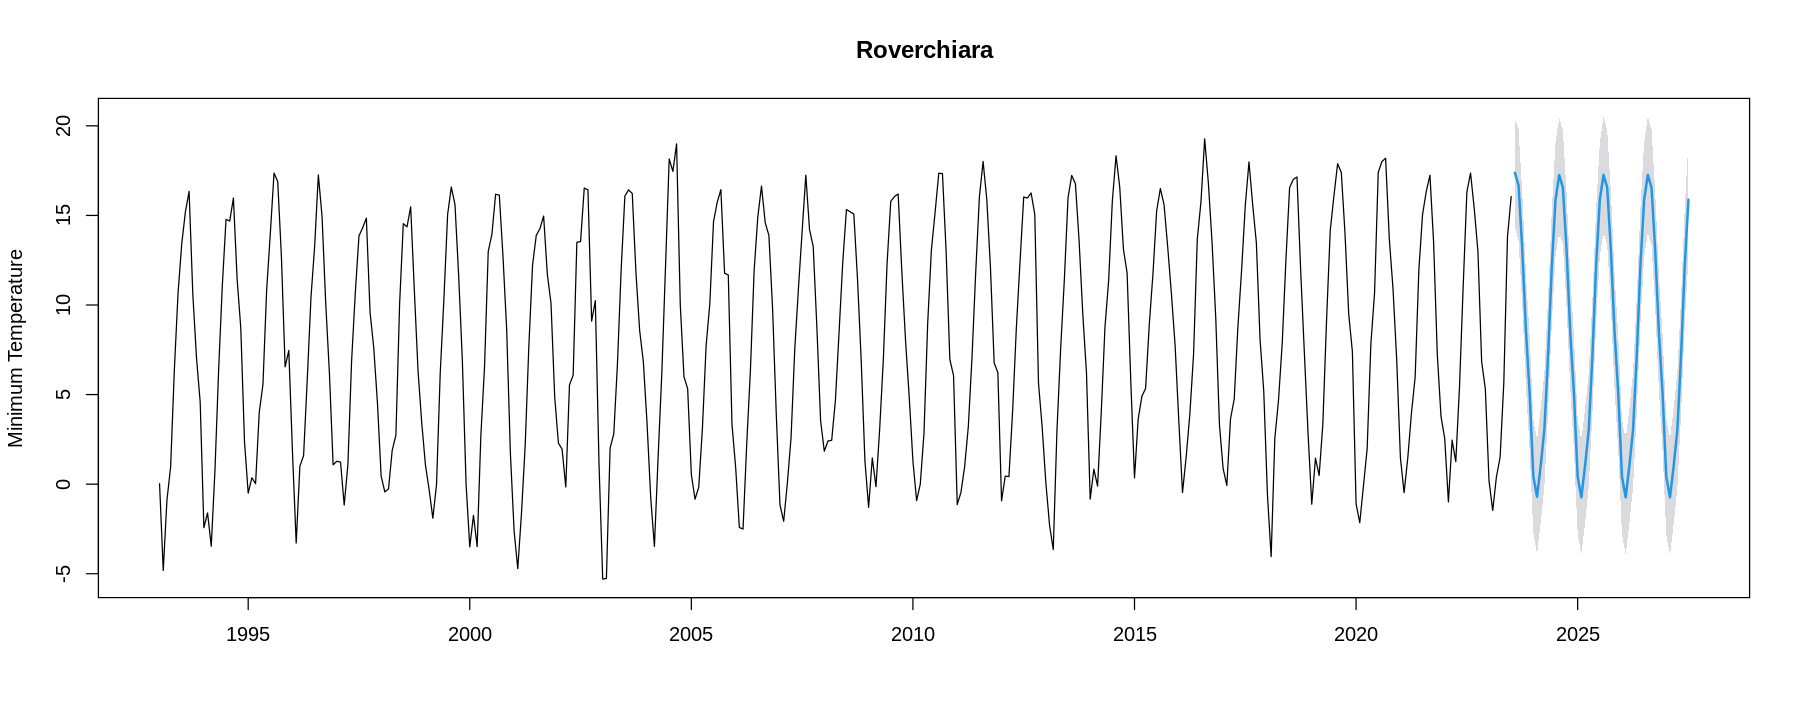

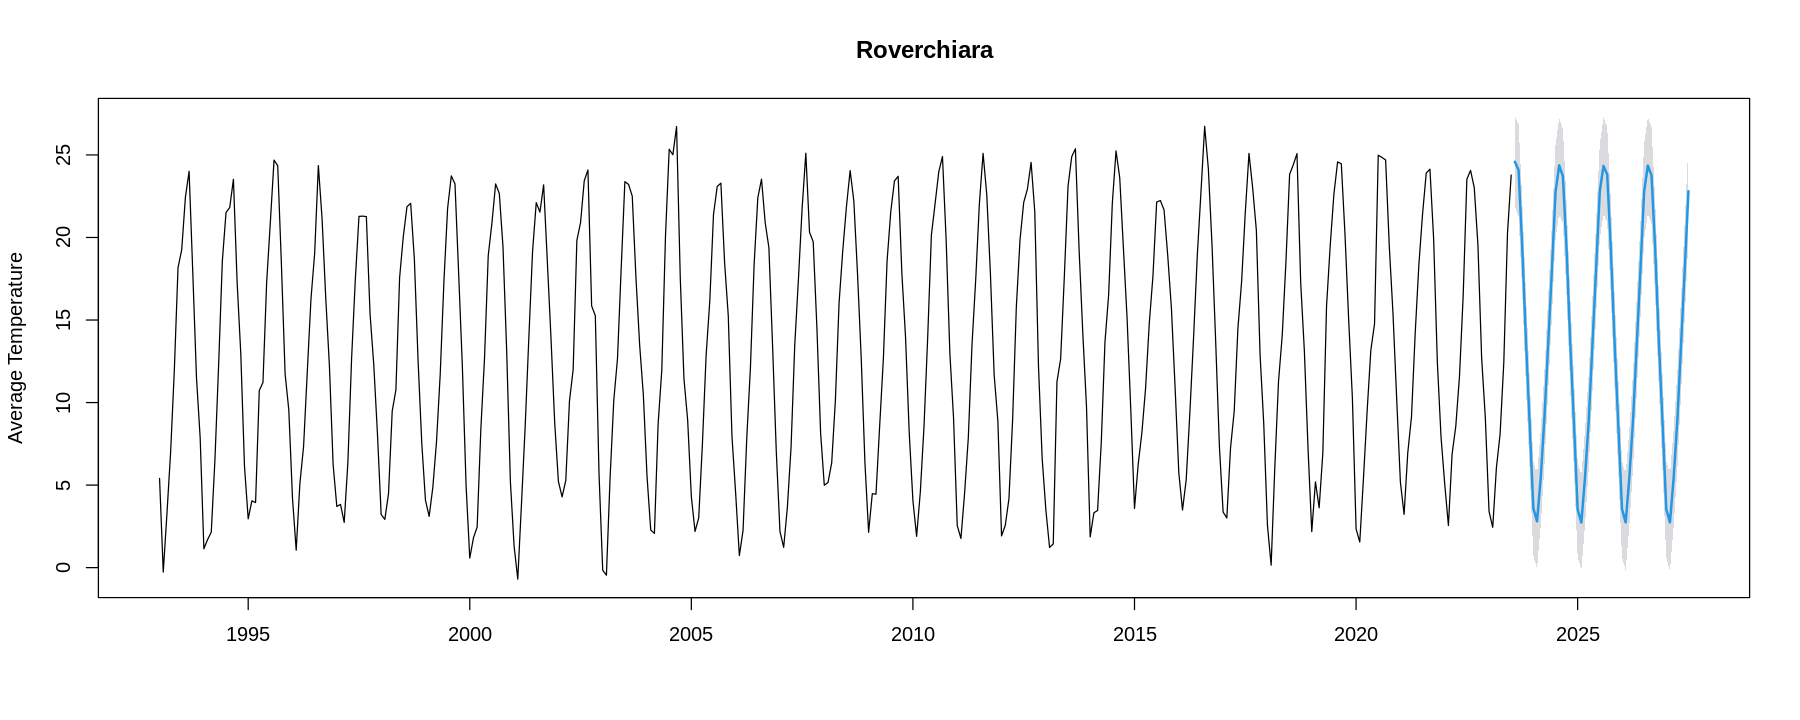

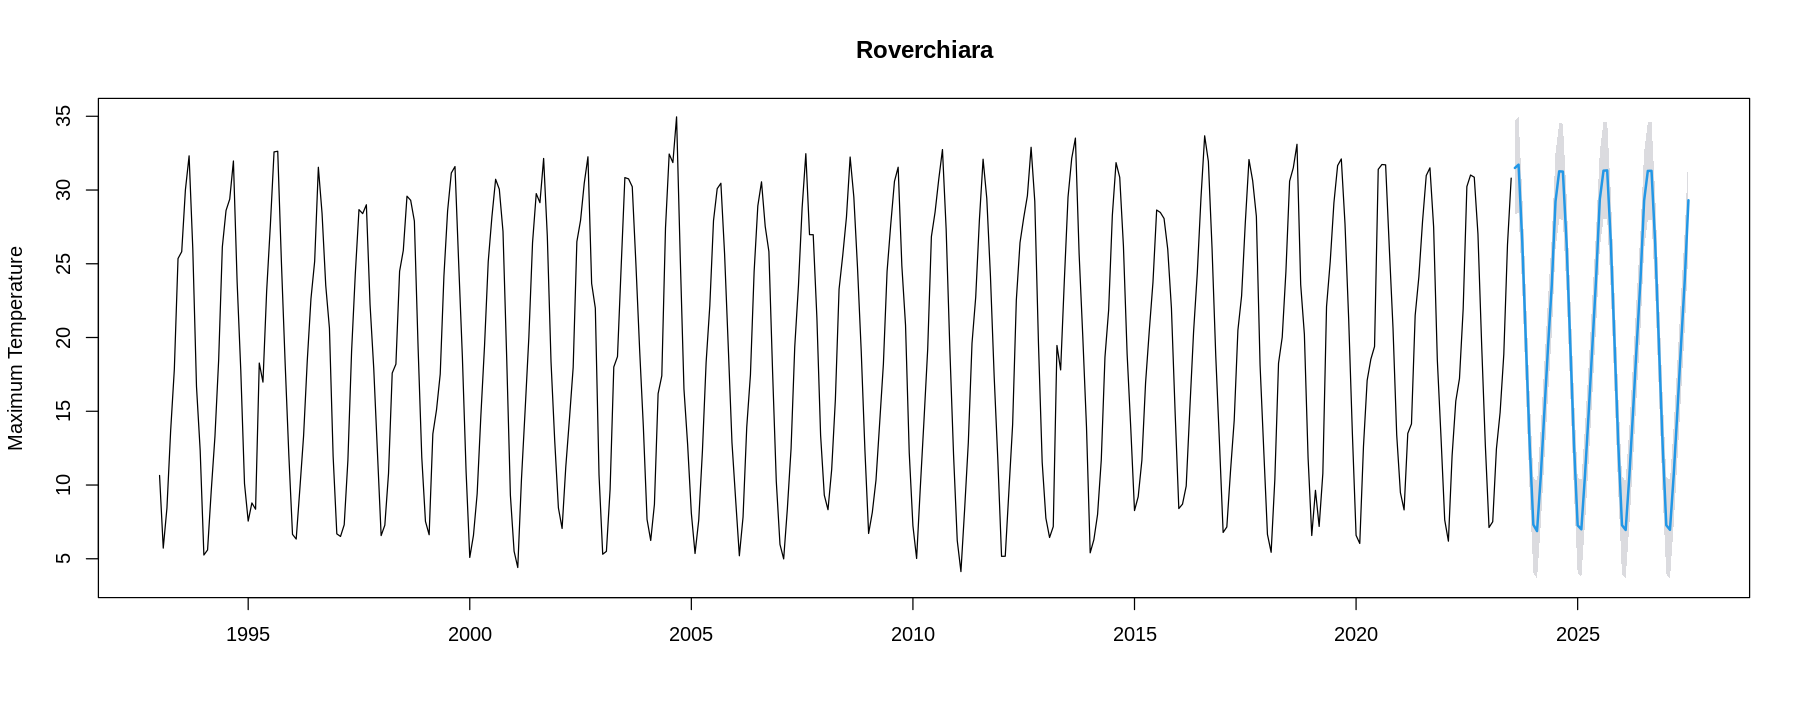

In [46]:
ARIMA(df2_0, 2)

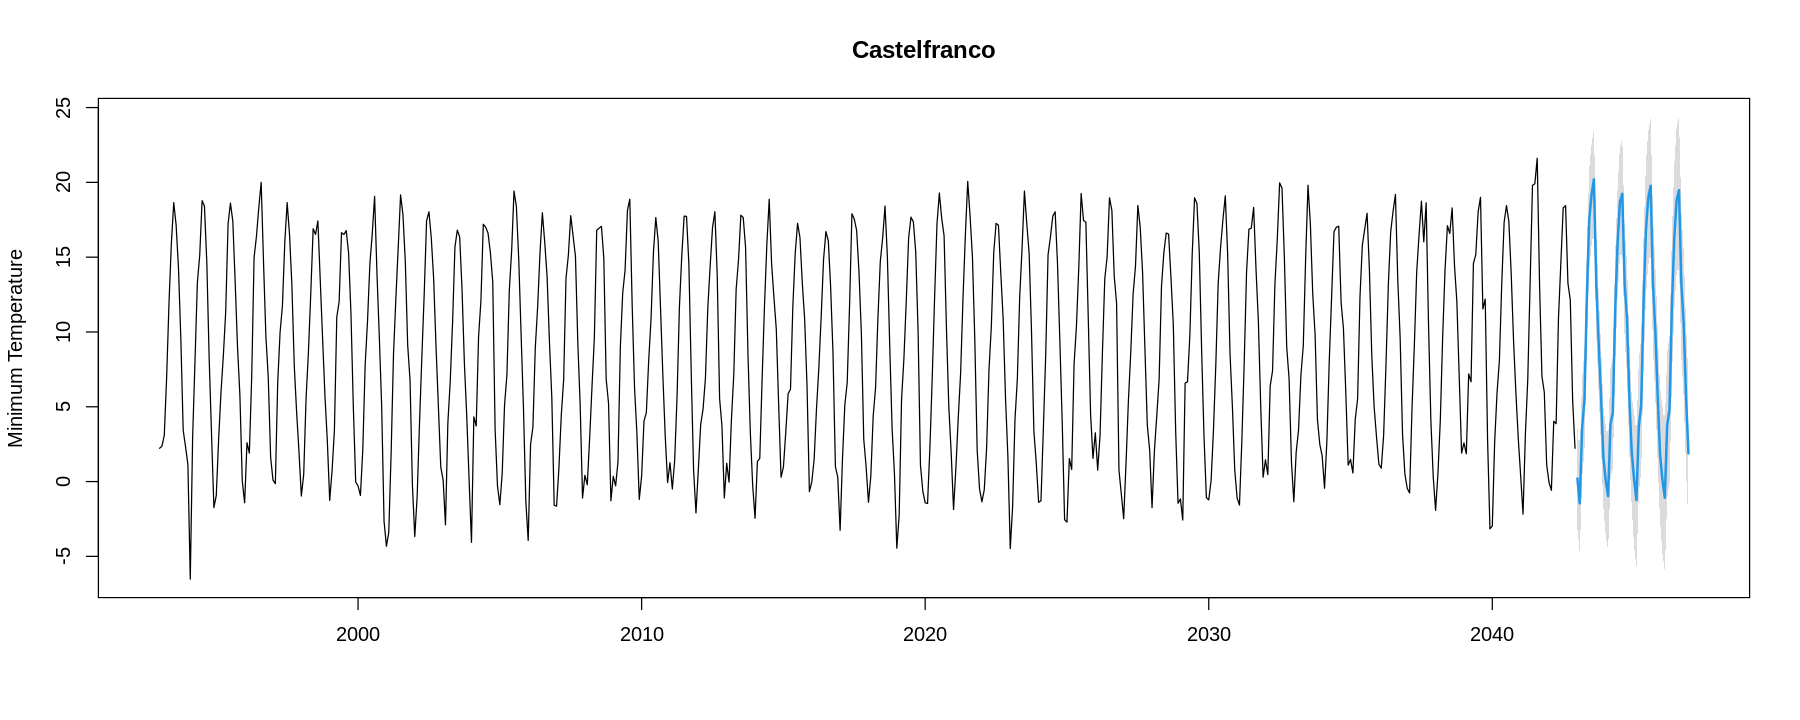

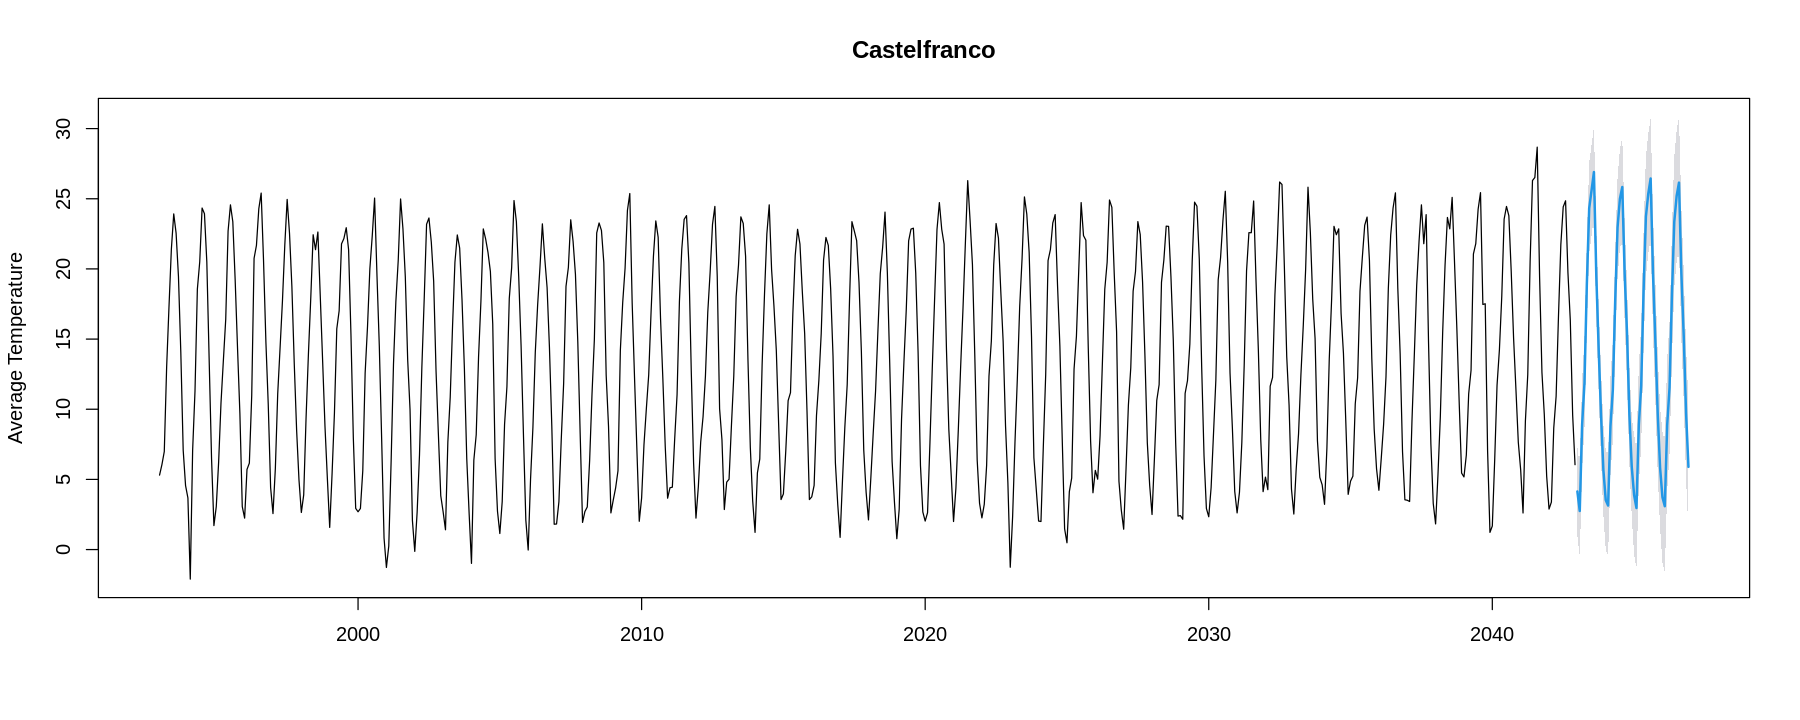

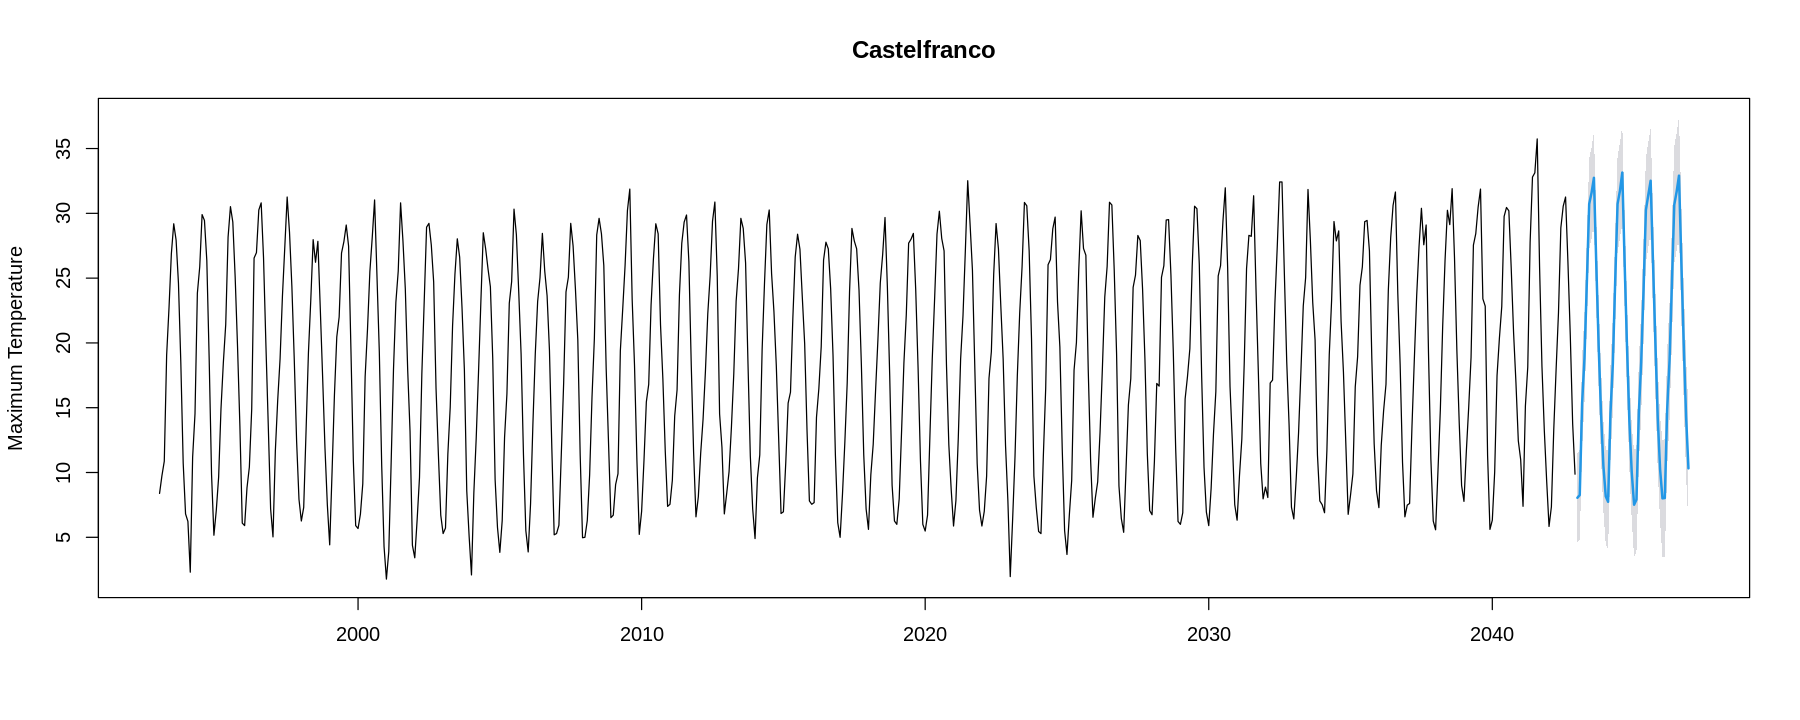

In [47]:
ARIMA(df3_0, 3)

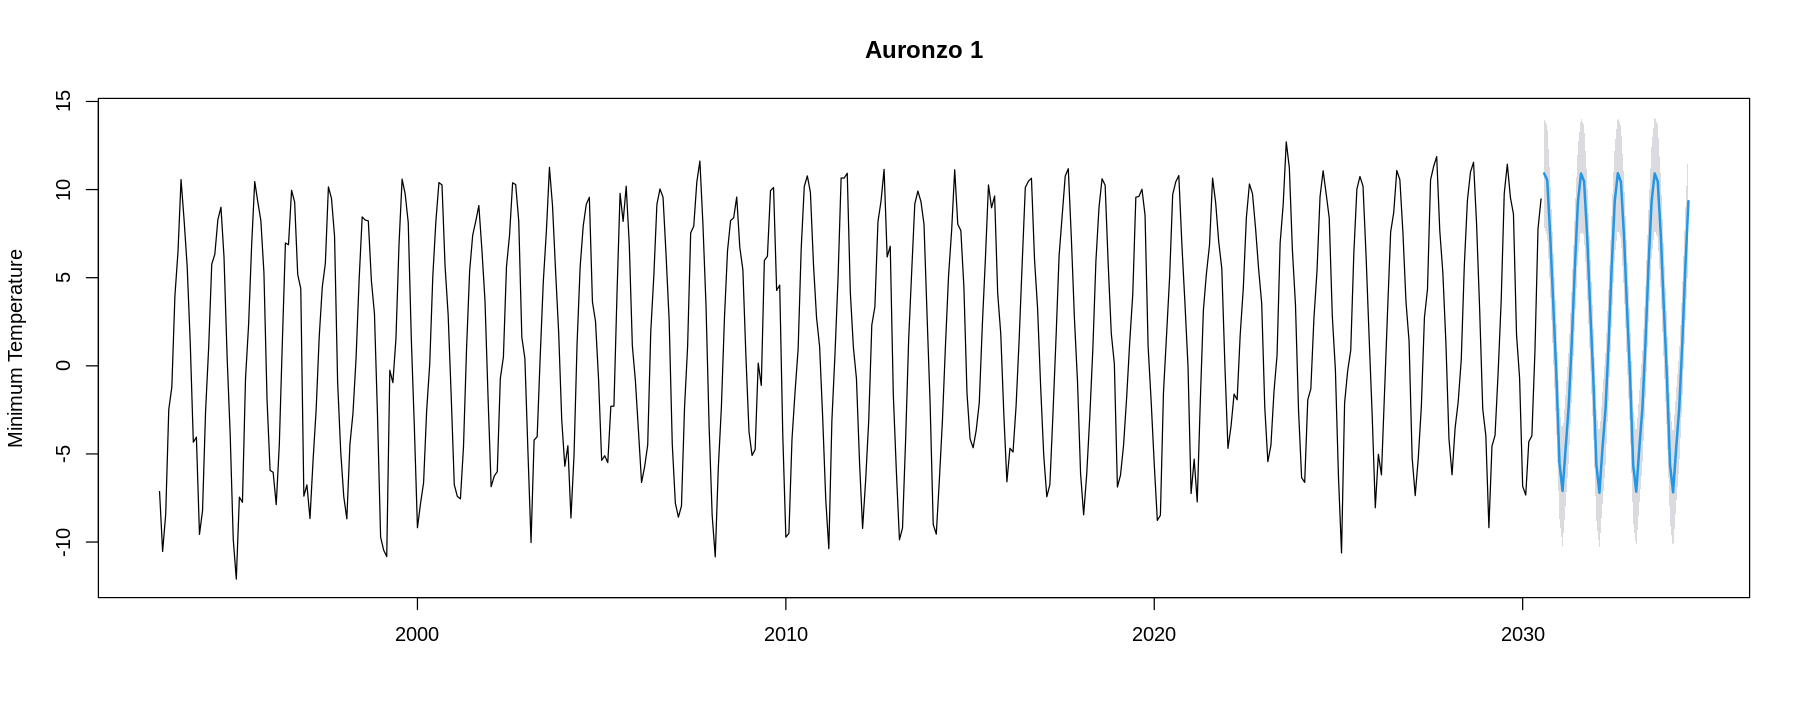

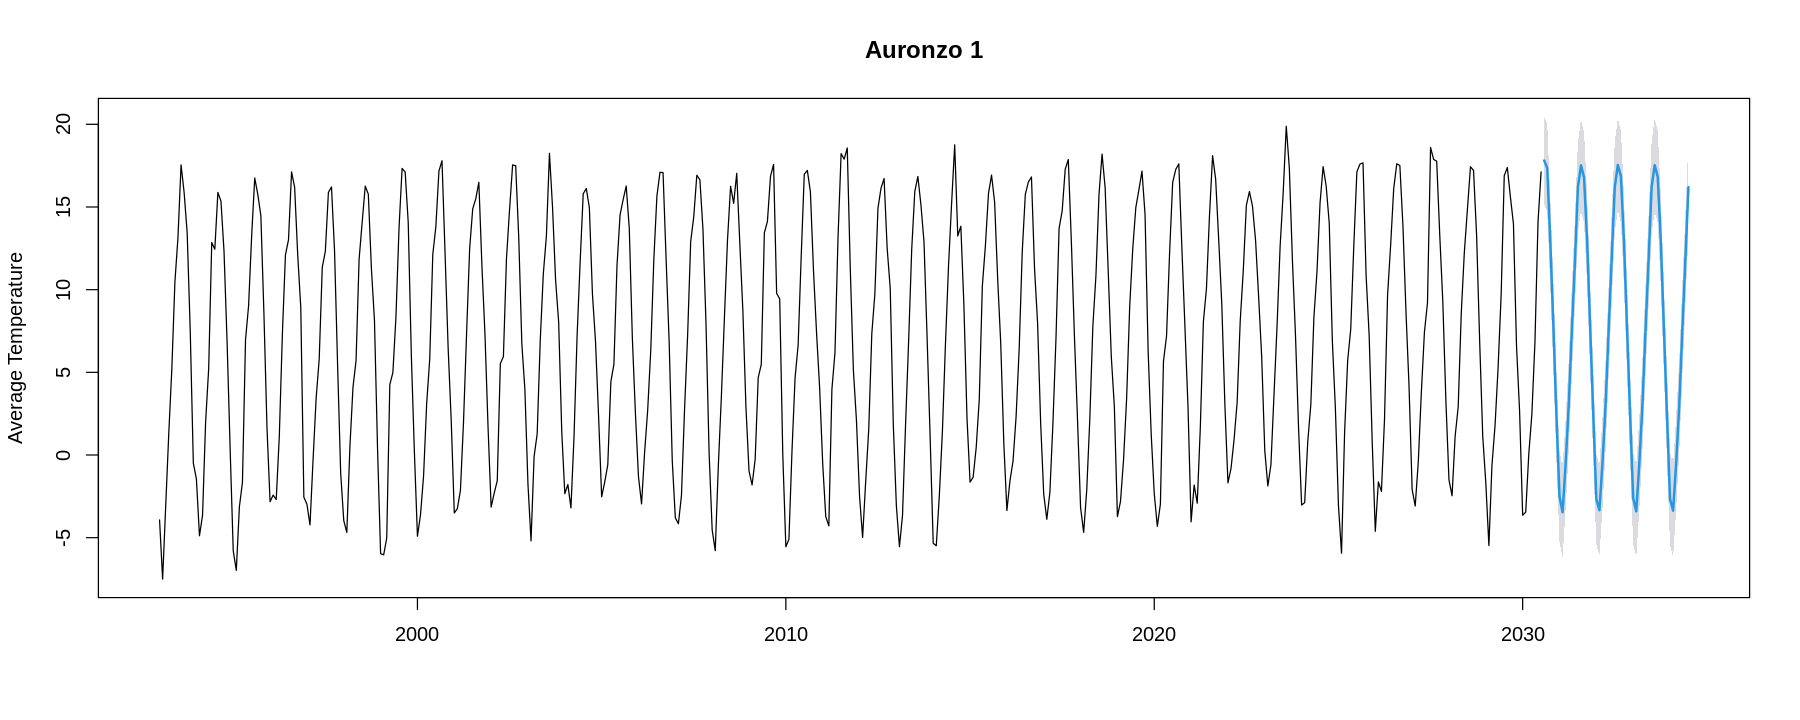

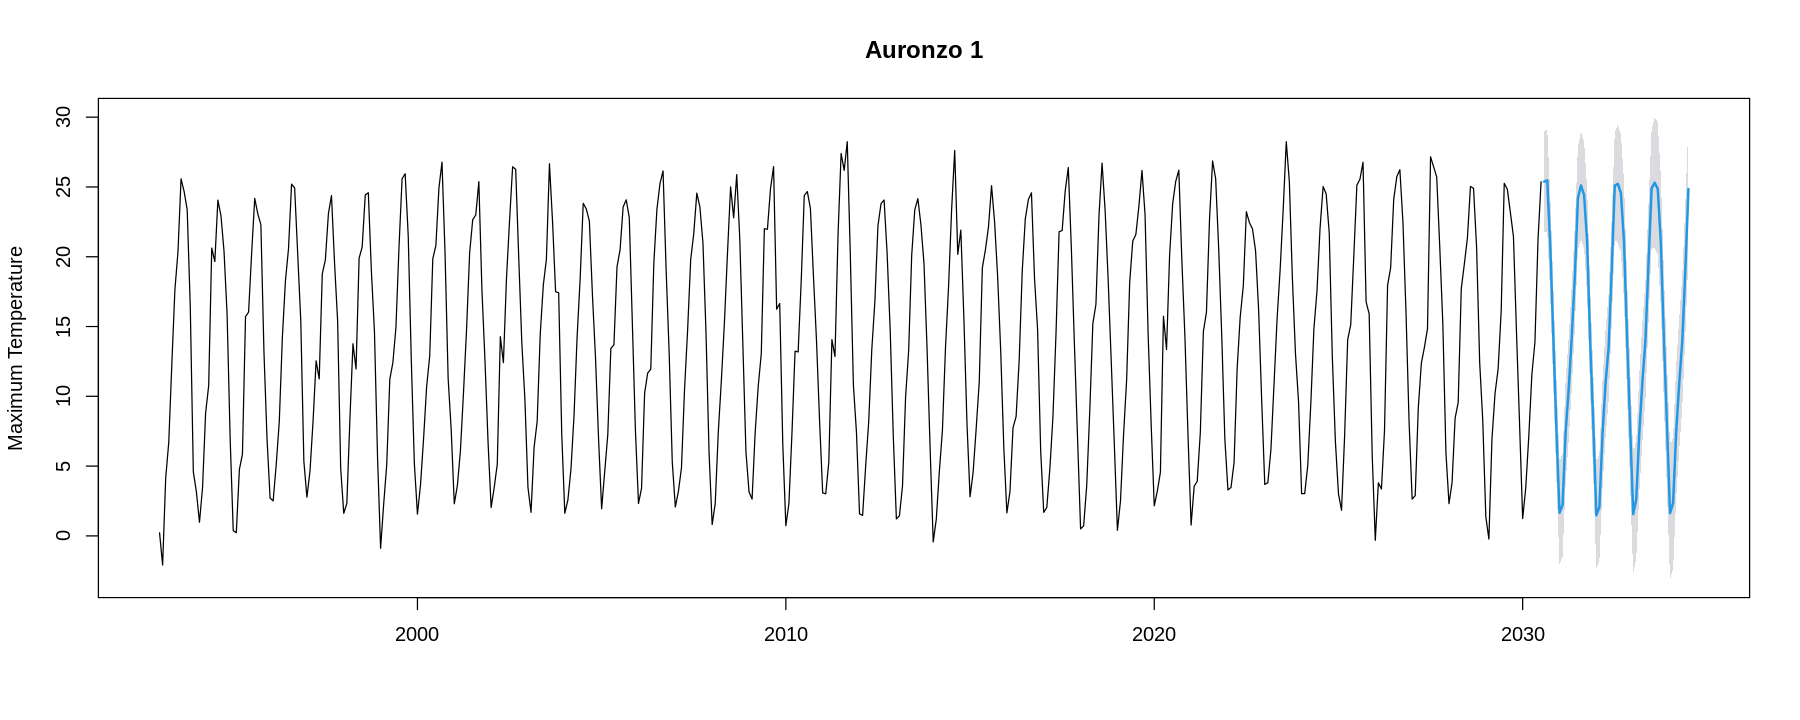

In [48]:
ARIMA(df4_0, 4)

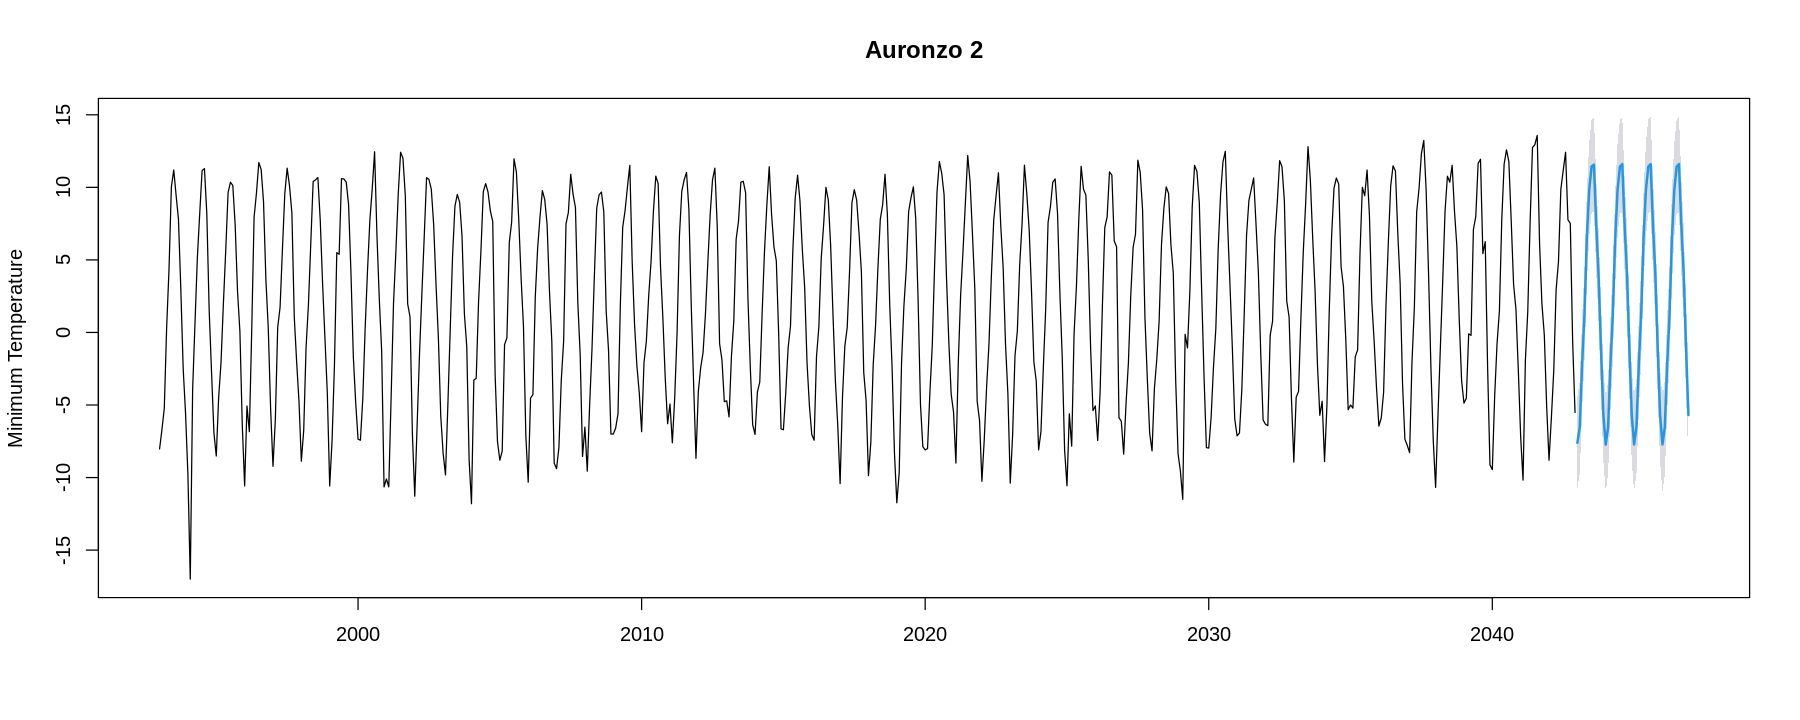

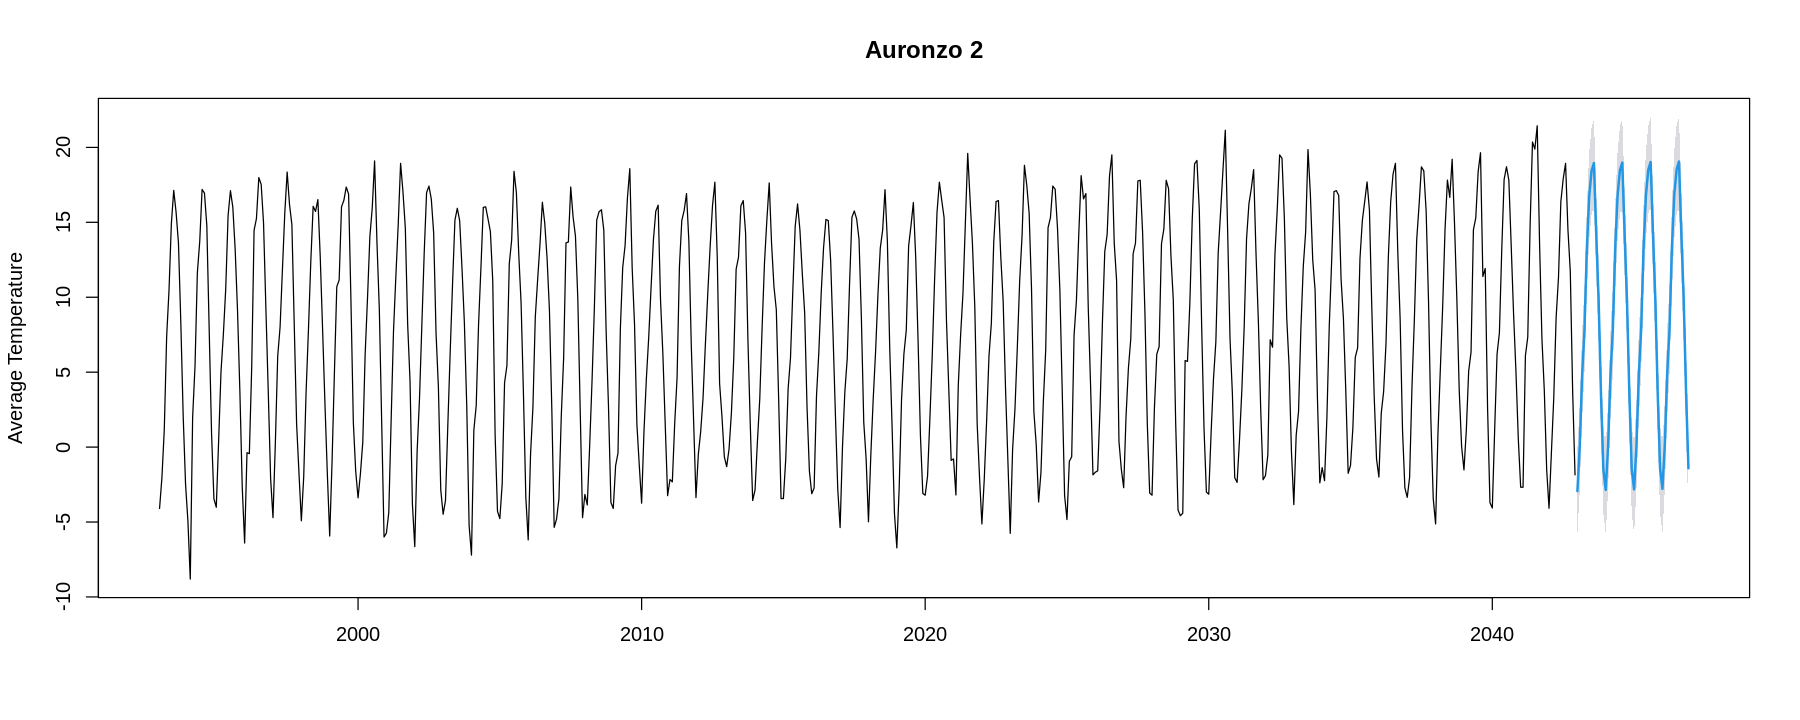

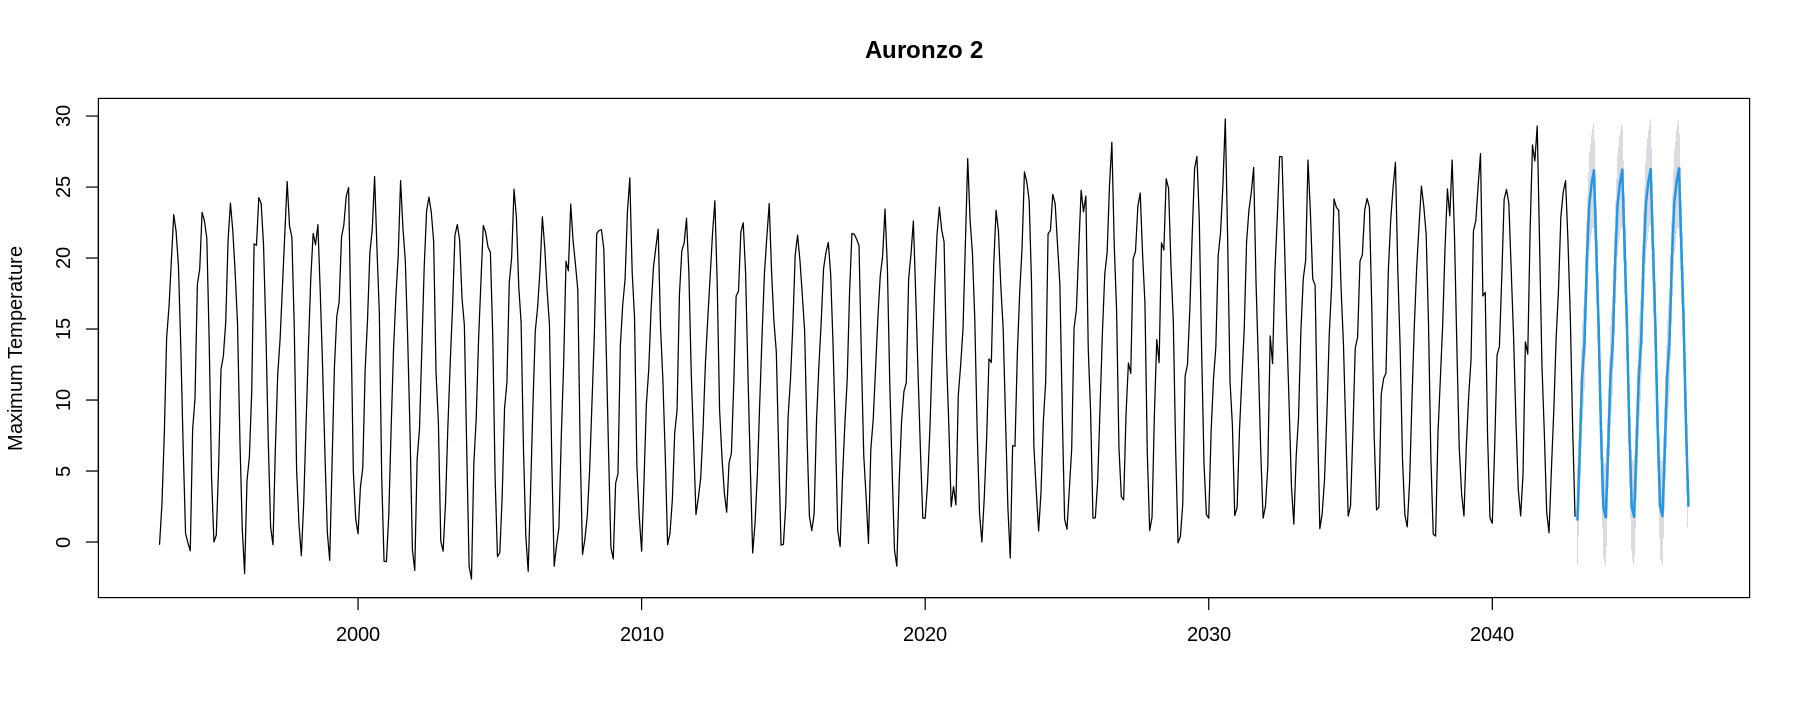

In [49]:
ARIMA(df5_0, 5)

# Conclusion

- There is a increasing linear tendece in the Temperature in our data for the last 20 years.

- Temperature for each month can be properly forcasted with ARIMA.